In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from chart_studio import plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE 


In [2]:
# print(os.listdir("../Software_Defect"))
df = pd.read_csv('C:/Users/kushagra vashistha/Downloads/pc1.csv')

In [3]:
df['defects'] = df['defects'].replace({True: 0, False: 1})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                1109 non-null   float64
 1   v(g)               1109 non-null   float64
 2   ev(g)              1109 non-null   float64
 3   iv(G)              1109 non-null   float64
 4   N                  1109 non-null   float64
 5   V                  1109 non-null   float64
 6   L                  1109 non-null   float64
 7   D                  1109 non-null   float64
 8   I                  1109 non-null   float64
 9   E                  1109 non-null   float64
 10  B                  1109 non-null   float64
 11  T                  1109 non-null   float64
 12  lOCode             1109 non-null   int64  
 13  lOComment          1109 non-null   int64  
 14  locCodeAndComment  1109 non-null   int64  
 15  lOBlank            1109 non-null   int64  
 16  uniq_Op            1109 

#CHECKING FOR NULL VALUES, IMBALACING AND MISSING VALUES

In [5]:
import pandas as pd

try:
    # Check for null and missing values
    null_values = df.isnull().sum()
    missing_values = df.isna().sum()

    # Check for imbalance in the target variable (assuming the last column is the target)
    defects = df.columns[-1]  # Update if your target column is known and not the last one
    imbalance = df[defects].value_counts(normalize=True) * 100

    print("Null Values in Each Column:\n", null_values)
    print("\nMissing Values in Each Column:\n", missing_values)
    print("\nClass Distribution in Target Column (%):\n", imbalance)

except Exception as e:
    print("An error occurred:", e)


Null Values in Each Column:
 loc                  0
v(g)                 0
ev(g)                0
iv(G)                0
N                    0
V                    0
L                    0
D                    0
I                    0
E                    0
B                    0
T                    0
lOCode               0
lOComment            0
locCodeAndComment    0
lOBlank              0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

Missing Values in Each Column:
 loc                  0
v(g)                 0
ev(g)                0
iv(G)                0
N                    0
V                    0
L                    0
D                    0
I                    0
E                    0
B                    0
T                    0
lOCode               0
lOComment            0
locCodeAndComment    0
lOBlank              0
uniq_Op              0
uniq_Opnd            0
total

In [6]:
# Check the size of the dataset
print(f"Dataset size: {df.shape}")

# Make sure that there are more than a handful of rows
if df.shape[0] > 10:  # This is just an arbitrary low number for demonstration purposes
    print("Dataset has sufficient rows.")
else:
    print("Dataset may not have enough rows. Check preprocessing steps.")


Dataset size: (1109, 22)
Dataset has sufficient rows.


In [7]:
df.head(100)

,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,...,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,1
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,0
2,91.0,9.0,3.0,2.0,318.0,2089.21,0.04,27.68,75.47,57833.24,...,80,44,11,31,29.0,66.0,192.0,126.0,17.0,0
3,109.0,21.0,5.0,18.0,381.0,2547.56,0.04,28.37,89.79,72282.68,...,97,41,12,24,28.0,75.0,229.0,152.0,38.0,0
4,505.0,106.0,41.0,82.0,2339.0,20696.93,0.01,75.93,272.58,1571506.88,...,457,71,48,49,64.0,397.0,1397.0,942.0,178.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7.0,1.0,1.0,1.0,31.0,129.27,0.24,4.14,31.25,534.70,...,7,9,0,5,7.0,11.0,18.0,13.0,1.0,1
96,9.0,2.0,1.0,1.0,30.0,120.00,0.24,4.20,28.57,504.00,...,9,2,0,2,6.0,10.0,16.0,14.0,3.0,1
97,10.0,1.0,1.0,1.0,35.0,153.73,0.17,5.91,26.02,908.41,...,10,15,0,11,10.0,11.0,22.0,13.0,1.0,1
98,7.0,1.0,1.0,1.0,31.0,129.27,0.24,4.14,31.25,534.70,...,7,9,0,5,7.0,11.0,18.0,13.0,1.0,1


#CHECKING FOR OUTLIERS

Removing Outliers: This is straightforward but might lead to a loss of data, which can be problematic if your dataset isn't large.
Capping Outliers: This involves setting the outliers to a maximum and/or minimum value, defined typically by the upper and lower bounds used in the IQR method.
Transforming Data: Applying transformations (e.g., logarithmic, square root) can reduce the effect of outliers by compressing the scale.
Capping Outliers
Given that removing outliers can result in a significant reduction in dataset size, and transformations might not always be suitable, we'll go with capping outliers. This method involves replacing outlier values with the upper or lower bounds as defined by the IQR.

In [8]:
import pandas as pd
import numpy as np


# Impute missing values using median
df.fillna(df.median(), inplace=True)

# Calculate IQR for each column to detect outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
outlier_data = df[outliers]

print("Number of Outliers Detected:", outlier_data.shape[0])
print("Outliers per Column:", outliers.sum())


Number of Outliers Detected: 454
Outliers per Column: 454


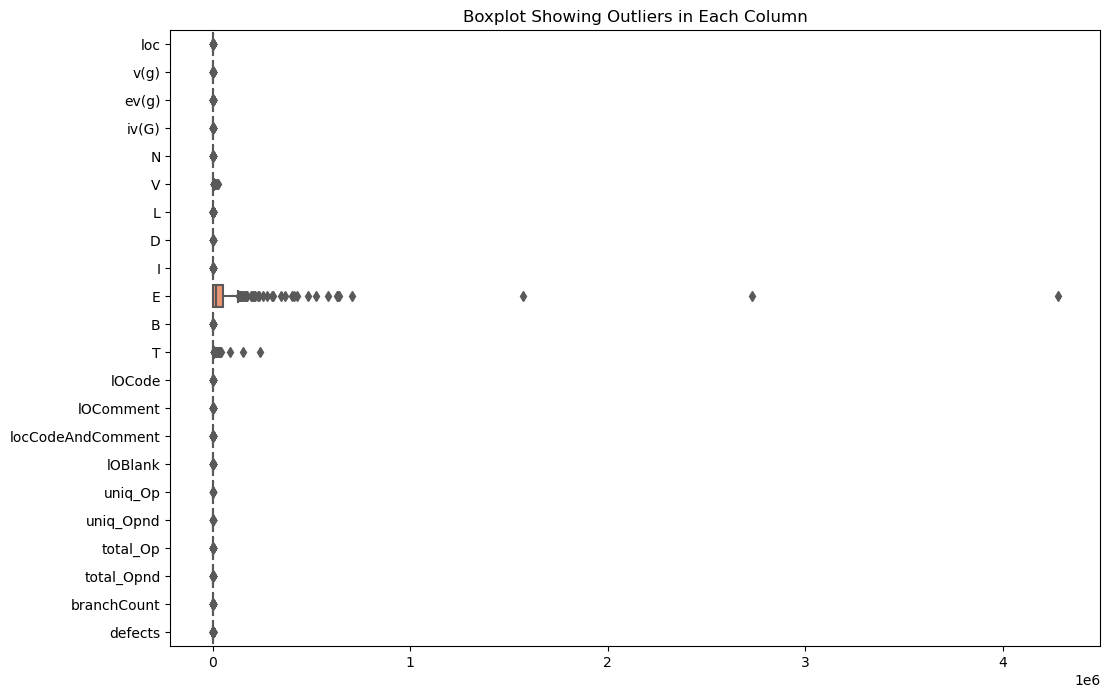

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate IQR for each feature to detect outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Calculate the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Selecting data that falls outside of the lower and upper bounds
outliers = (df < lower_bound) | (df > upper_bound)

# Select only the rows with at least one outlier to visualize
outlier_data = df[outliers.any(axis=1)]

# Plotting using seaborn's boxplot for visualization
plt.figure(figsize=(12, 8))
sns.boxplot(data=outlier_data, orient='h', palette="Set2")
plt.title('Boxplot Showing Outliers in Each Column')
plt.show()


#HANDELING OUTLIERS

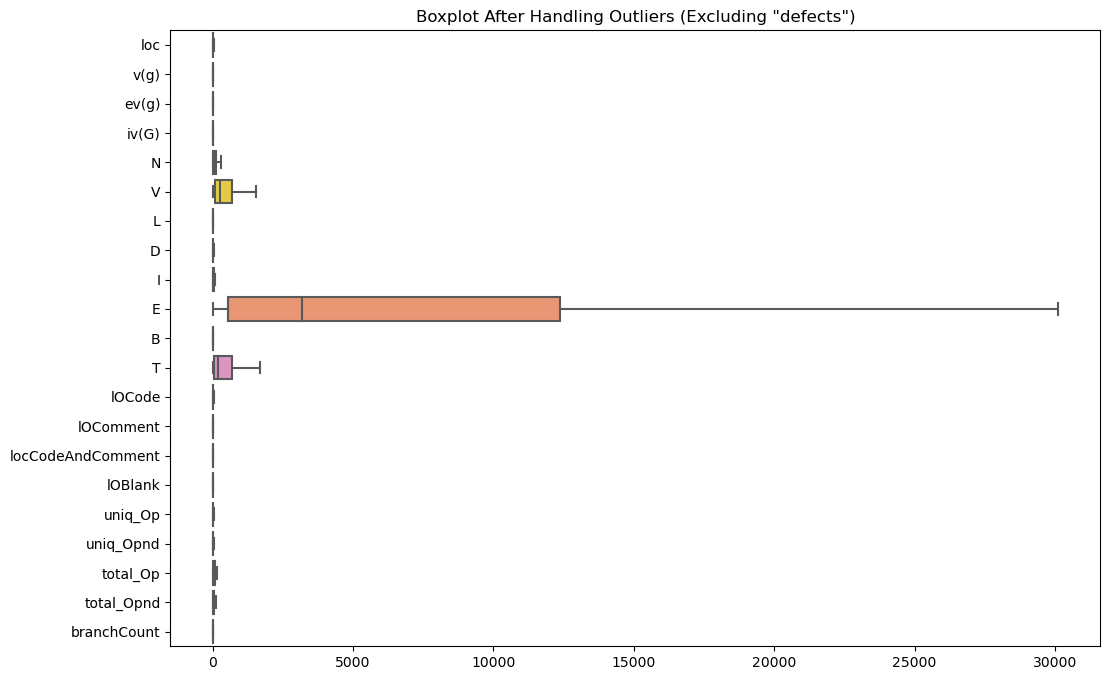

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it's already loaded
# Example: df = pd.read_csv('your_data.csv')

# Calculate Q1, Q3, and IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bound for each column
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap outliers using np.where conditionally, but skip the 'defects' column
for col in df.columns:
    if col != 'defects' and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])
        df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])

# Now create a new DataFrame excluding 'defects' column for the boxplot
outlier_data = df.drop(columns=['defects'])

# Verify changes by plotting a boxplot to visualize outliers for all columns except 'defects'
plt.figure(figsize=(12, 8))
sns.boxplot(data=outlier_data, orient='h', palette="Set2")
plt.title('Boxplot After Handling Outliers (Excluding "defects")')
plt.show()


In [11]:
#outlier_data.head(100)
# Assuming 'df' is the original DataFrame and you have already capped the outliers for other columns
# and created 'df_without_defects' without the 'defects' column

# Now create a new DataFrame called 'outlier_data' that includes the 'defects' column
df_new = outlier_data.copy()
df_new['defects'] = df['defects']

# Now 'outlier_data' contains all the columns including the 'defects' column


#CHECKING FOR SKEWNESS

In [13]:
import pandas as pd

# Calculate skewness for each column
skewness = df_new.skew()

# Display the skewness values
print("Skewness of each feature:")
print(skewness)

# Interpretation of skewness
for col, value in skewness.items():
    if value > 1 or value < -1:
        print(f"{col} is highly skewed ({value}).")
    elif value > 0.5 or value < -0.5:
        print(f"{col} is moderately skewed ({value}).")
    else:
        print(f"{col} has little or no skew ({value}).")


Skewness of each feature:
loc                  1.078280
v(g)                 1.216306
ev(g)                1.328633
iv(G)                0.986722
N                    1.113565
V                    1.144321
L                    1.073584
D                    1.032987
I                    1.019956
E                    1.170821
B                    1.168921
T                    1.170819
lOCode               0.998069
lOComment            1.233718
locCodeAndComment    1.548127
lOBlank              1.130629
uniq_Op              0.647617
uniq_Opnd            1.082877
total_Op             1.120575
total_Opnd           1.156442
branchCount          1.245263
defects             -3.392393
dtype: float64
loc is highly skewed (1.0782799492219175).
v(g) is highly skewed (1.2163057256948708).
ev(g) is highly skewed (1.3286330169698515).
iv(G) is moderately skewed (0.9867215362819127).
N is highly skewed (1.1135653268415369).
V is highly skewed (1.1443213149755829).
L is highly skewed (1.07358421499788

ValueError: num must be 1 <= num <= 16, not 17

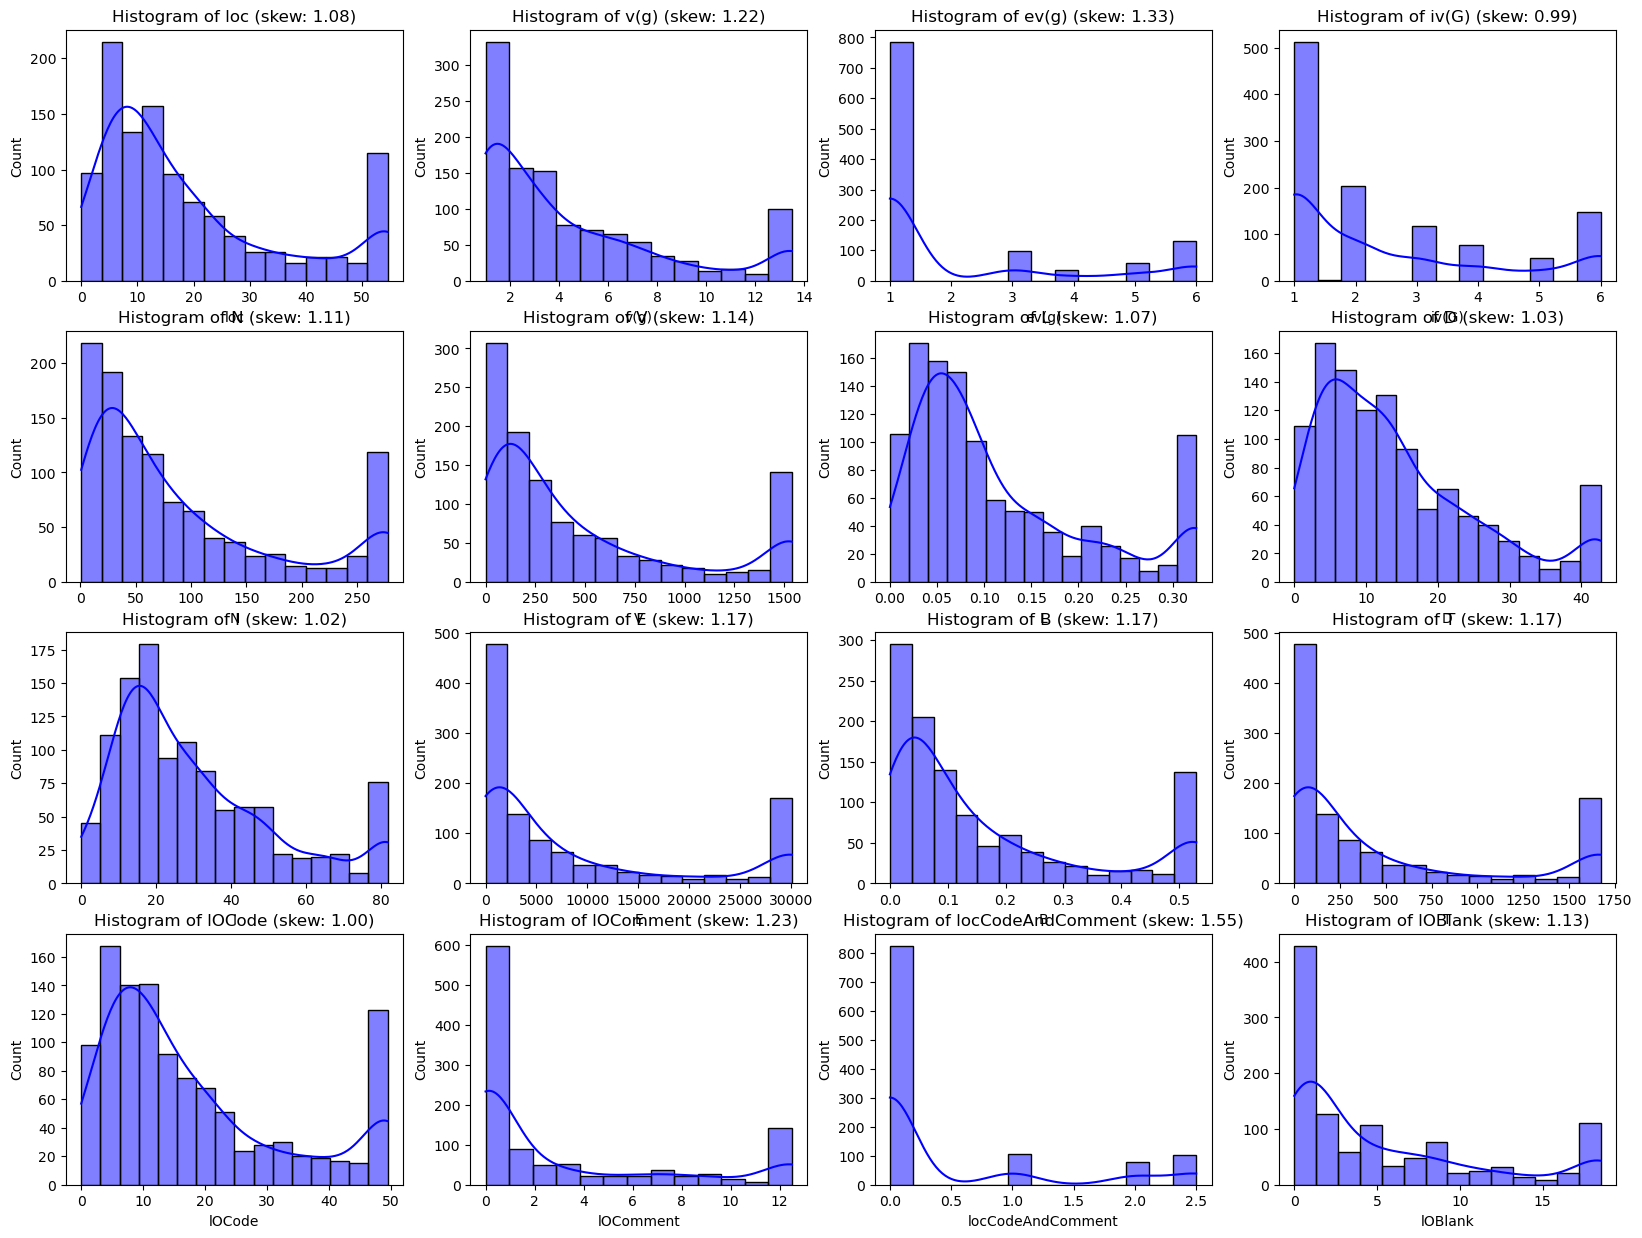

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization layout
plt.figure(figsize=(20, 15))
for i, col in enumerate(df_new.columns, 1):
    plt.subplot(4, 4, i)  # Adjust the grid size depending on the number of columns
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Histogram of {col} (skew: {df[col].skew():.2f})')

plt.tight_layout()
plt.show()


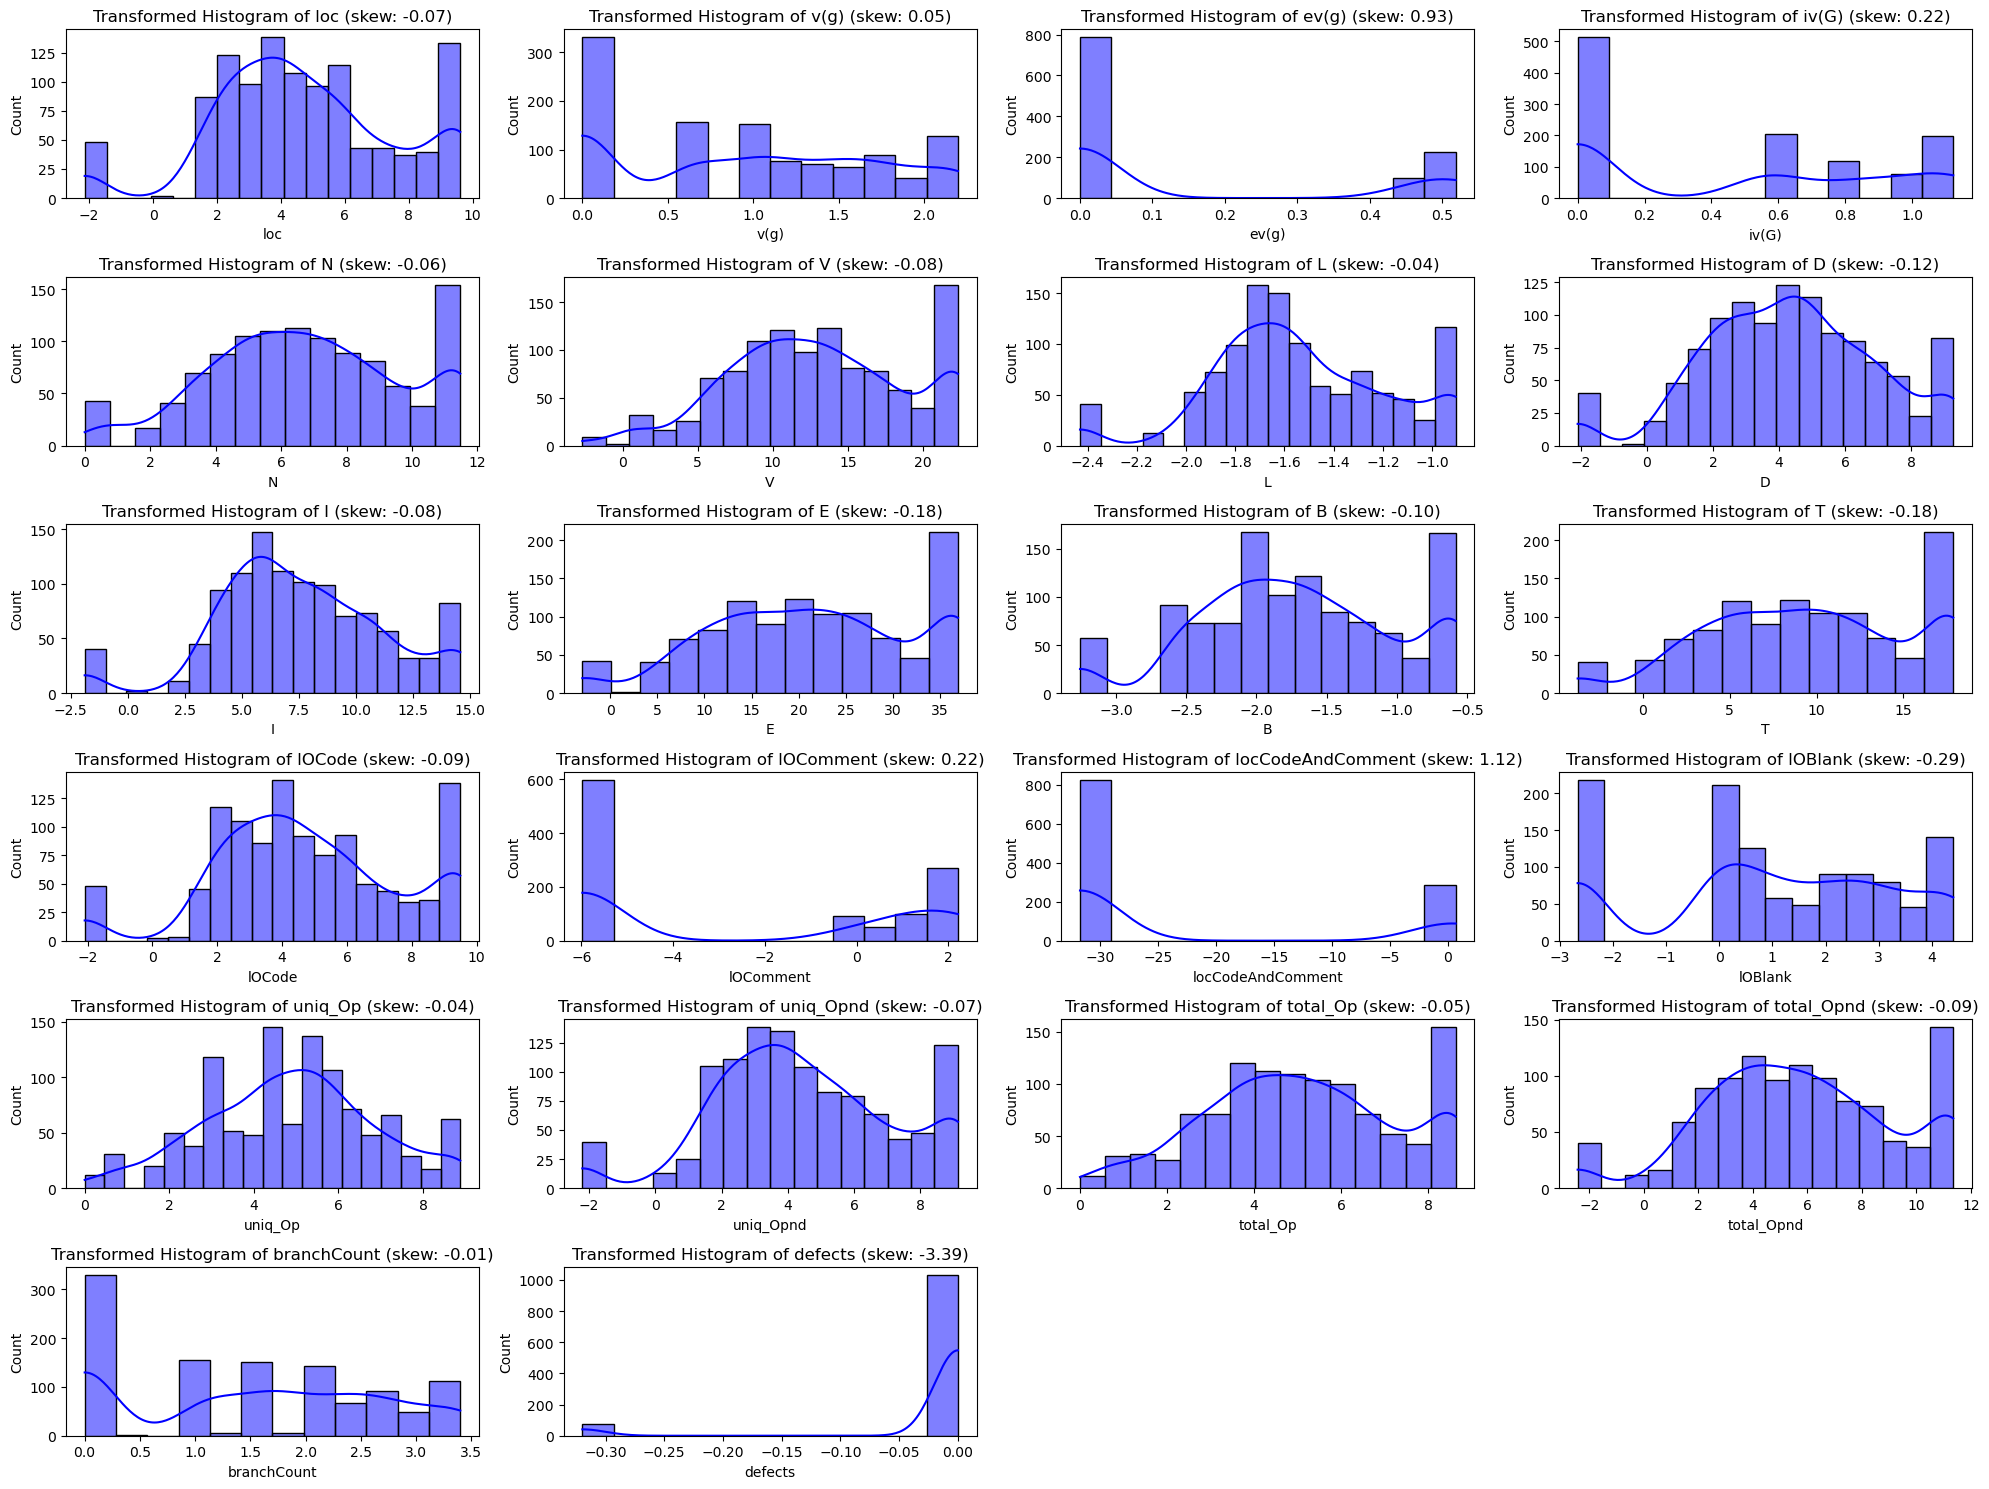

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# Load your data here, ensure 'df' is your DataFrame

# Identify numeric columns to adjust and transform
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Adjust zero or negative values if necessary
for col in numeric_cols:
    # Replace zeros and negative values with NaN
    df[col] = df[col].apply(lambda x: np.nan if x <= 0 else x)

# Replace NaNs with a small positive number (smallest positive number in each column * 0.01)
for col in numeric_cols:
    min_val = df[col].min()
    if pd.notna(min_val):
        df[col].fillna(min_val * 0.01, inplace=True)

# Initialize DataFrame for transformed data
transformed_data = pd.DataFrame()

# Apply Box-Cox transformation to numeric columns only
for col in numeric_cols:
    try:
        transformed_data[col], fitted_lambda = boxcox(df[col])
    except ValueError:
        # If Box-Cox transformation fails (e.g., due to non-positive values), copy original
        transformed_data[col] = df[col]

# Visualize the transformed data
plt.figure(figsize=(20, 15))
for i, col in enumerate(transformed_data.columns):
    plt.subplot((len(numeric_cols) + 3) // 4, 4, i + 1)  # Adjust grid size based on number of numeric columns
    sns.histplot(transformed_data[col], kde=True, color='blue')
    plt.title(f'Transformed Histogram of {col} (skew: {transformed_data[col].skew():.2f})')

plt.tight_layout()
plt.show()


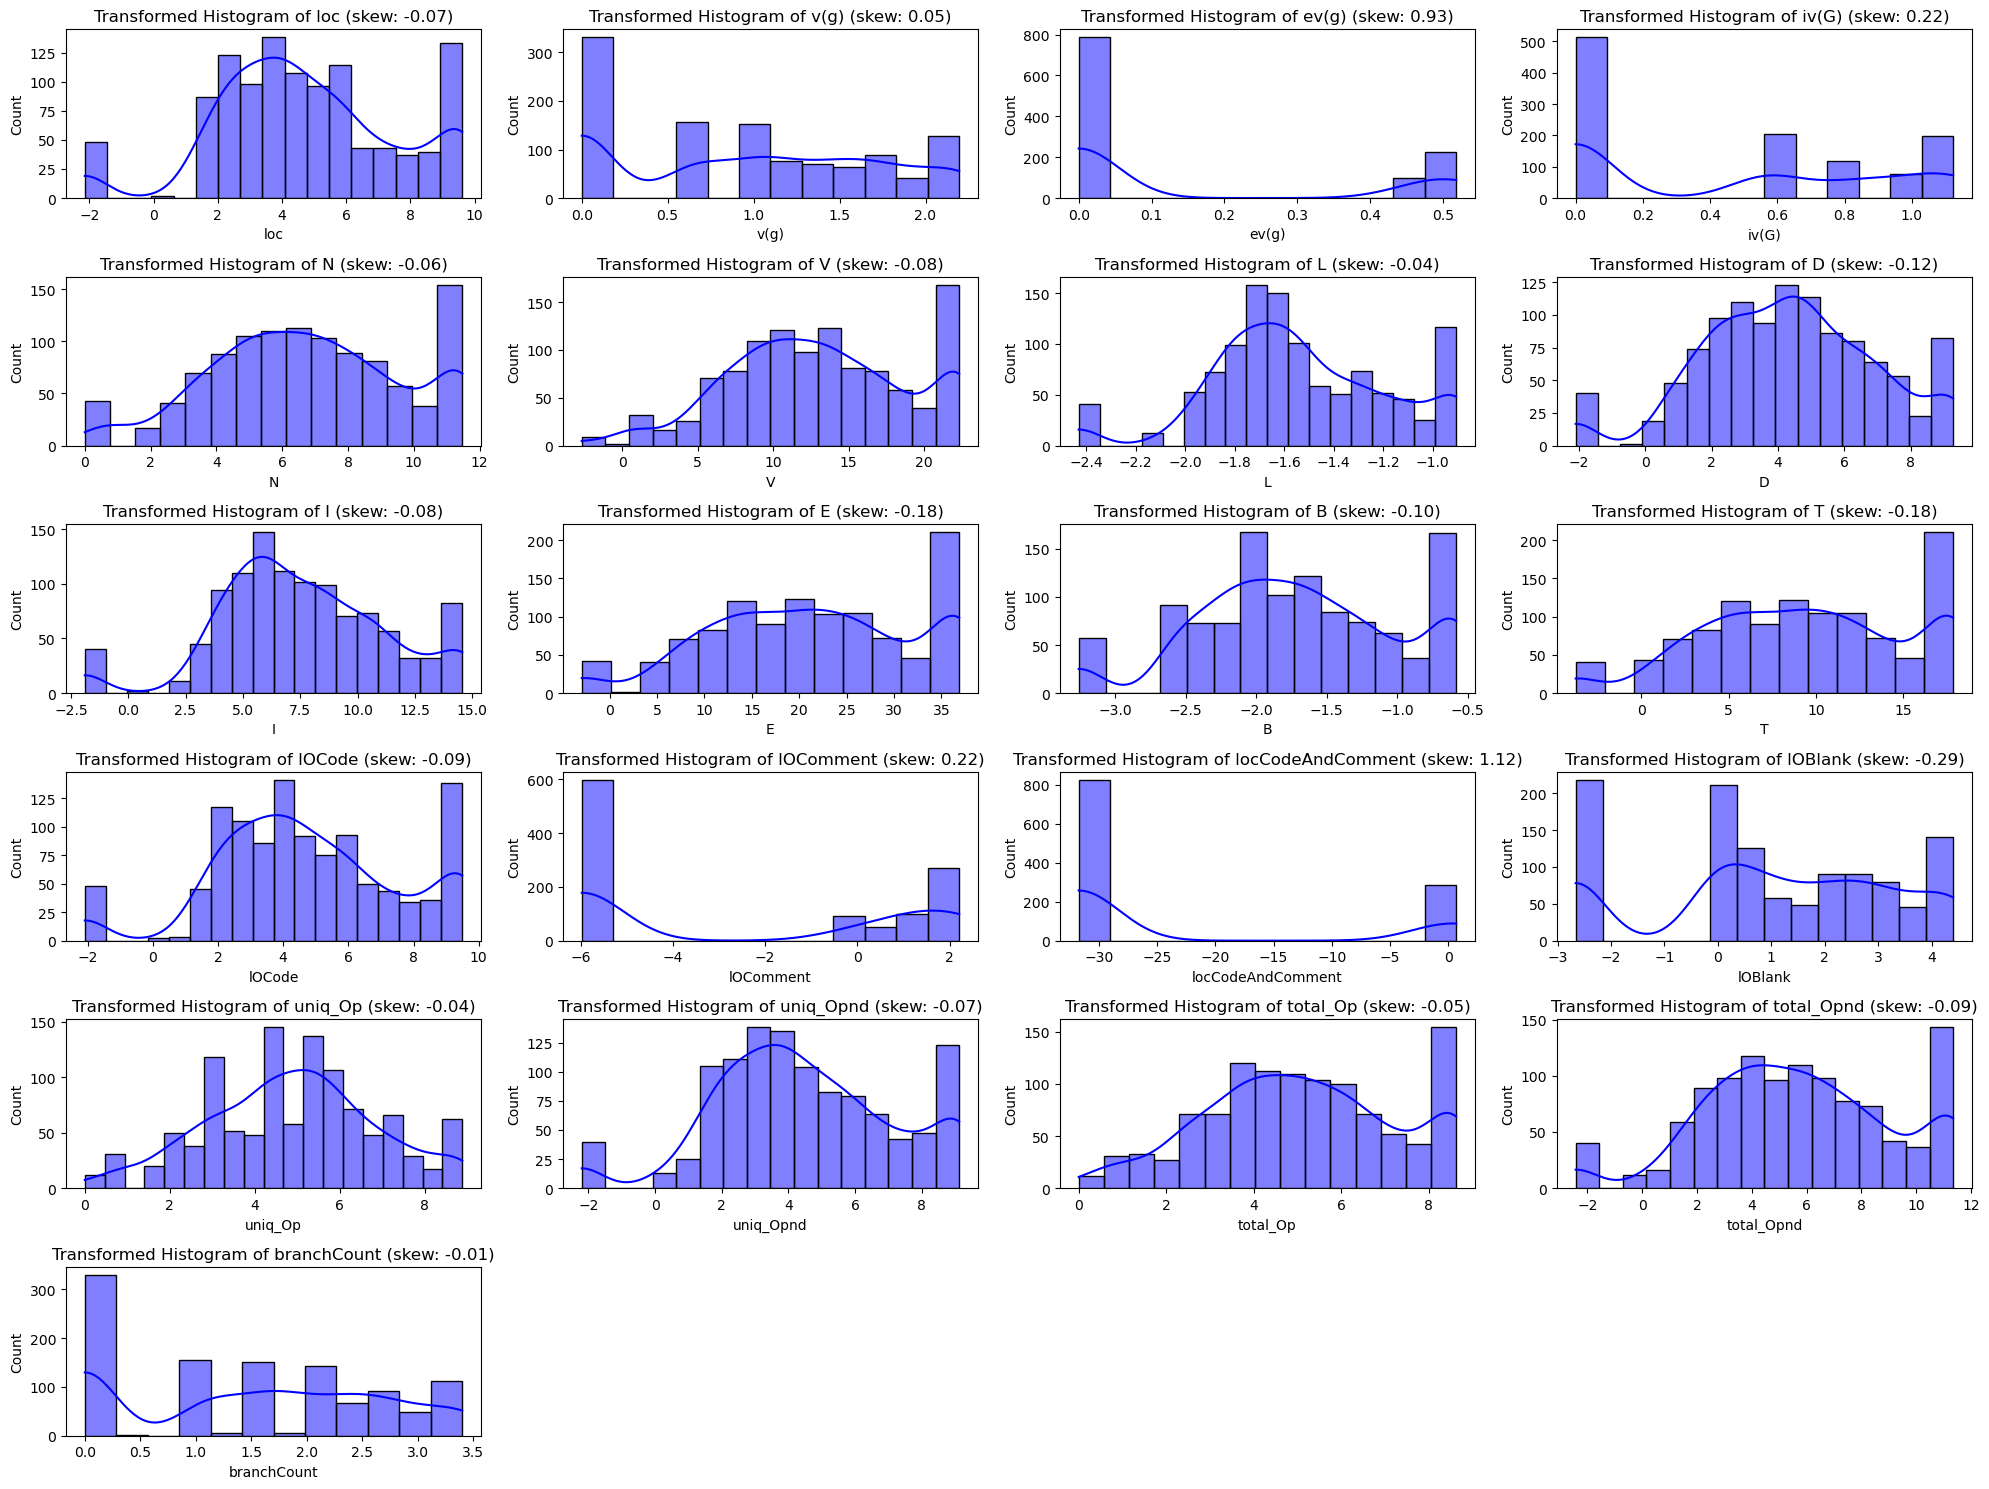

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox

# Load your data here, ensure 'df' is your DataFrame
# df = pd.read_csv('path_to_your_dataset.csv')

# Identify numeric columns, excluding 'defects' for adjustment and transformation
numeric_cols = df_new.select_dtypes(include=[np.number]).columns.drop('defects')

# Adjust zero or negative values if necessary, excluding 'defects'
for col in numeric_cols:
    # Replace zeros and negative values with NaN
    df_new[col] = df_new[col].apply(lambda x: np.nan if x <= 0 else x)

# Replace NaNs with a small positive number, excluding 'defects'
for col in numeric_cols:
    min_val = df_new[col].min()
    if pd.notna(min_val):  # If not NaN, i.e., there are non-zero values
        df_new[col].fillna(min_val * 0.01, inplace=True)

# Initialize DataFrame for transformed data, excluding 'defects'
transformed_data = df_new[['defects']].copy()  # Start with a DataFrame that only contains 'defects'

# Apply Box-Cox transformation to numeric columns only, excluding 'defects'
for col in numeric_cols:
    try:
        # Transform the column and store in transformed_data
        transformed_data[col], fitted_lambda = boxcox(df_new[col])
    except ValueError as e:
        # If Box-Cox transformation fails (e.g., due to non-positive values), retain the original data
        transformed_data[col] = df_new[col]

# Visualize the transformed data, excluding 'defects'
plt.figure(figsize=(20, 15))
# Create subplots for each numeric column, excluding 'defects'
for i, col in enumerate(numeric_cols, 1):  # Start the loop with 1 to leave space for 'defects'
    plt.subplot((len(numeric_cols) + 3) // 4, 4, i)
    sns.histplot(transformed_data[col], kde=True, color='blue')
    plt.title(f'Transformed Histogram of {col} (skew: {transformed_data[col].skew():.2f})')

plt.tight_layout()
plt.show()


#CORRECTING SKEWEDNESS

In [106]:
# Calculate skewness for each column
skewness = transformed_data.skew()

# Display the skewness values
print("Skewness of each feature:")
print(skewness)

# Interpretation of skewness
for col, value in skewness.items():
    if value > 1 or value < -1:
        print(f"{col} is highly skewed ({value}).")
    elif value > 0.5 or value < -0.5:
        print(f"{col} is moderately skewed ({value}).")
    else:
        print(f"{col} has little or no skew ({value}).")

Skewness of each feature:
defects             -1.552134
loc                 -0.024884
v(g)                 0.025919
ev(g)                0.810073
iv(g)                0.108437
n                   -0.357858
v                   -0.390299
l                   -0.308042
d                   -0.338498
i                   -0.526885
e                   -0.345969
b                   -0.286183
t                   -0.288703
lOCode              -0.310172
lOComment            0.724100
lOBlank             -0.329350
locCodeAndComment         NaN
dtype: float64
defects is highly skewed (-1.552134209450036).
loc has little or no skew (-0.024884382002655938).
v(g) has little or no skew (0.025918739979885096).
ev(g) is moderately skewed (0.810073489233497).
iv(g) has little or no skew (0.10843662558146937).
n has little or no skew (-0.35785813957902923).
v has little or no skew (-0.3902990118417144).
l has little or no skew (-0.30804236879116415).
d has little or no skew (-0.3384975511667714).
i is modera

Adjusting Values: The data is adjusted to ensure all values are positive, as Box-Cox only works with positive values.
Transformation: The Box-Cox transformation is applied to each column. The lambda parameter for each transformation is automatically determined to best reduce skewness.
Visualization: After transformation, histograms with density plots are used to visualize the distribution of the transformed features, allowing you to assess the effectiveness of the transformation.

CHECKING IF DATASET NEEDS SCALING

In [17]:
import pandas as pd

# Check the range (min and max values) for each feature
feature_range = transformed_data.agg([min, max])

# Check the standard deviation for each feature
std_deviation = transformed_data.std()

# Display the results
print("Feature Range:\n", feature_range)
print("\nStandard Deviation:\n", std_deviation)


Feature Range:
      defects       loc      v(g)     ev(g)     iv(G)          N          V  \
min        0 -2.140867  0.000000  0.000000  0.000000   0.000000  -2.673344   
max        1  9.613767  2.196164  0.518351  1.122701  11.475524  22.317688   

            L         D          I  ...          T    lOCode  lOComment  \
min -2.430902 -2.100506  -1.894681  ...  -3.759643 -2.090541  -5.980070   
max -0.904708  9.276894  14.568786  ...  17.866193  9.495790   2.208101   

     locCodeAndComment   lOBlank   uniq_Op  uniq_Opnd  total_Op  total_Opnd  \
min         -31.752200 -2.660789  0.000000  -2.202845  0.000000   -2.430752   
max           0.683149  4.401395  8.879225   9.129970  8.624458   11.350974   

     branchCount  
min     0.000000  
max     3.400304  

[2 rows x 22 columns]

Standard Deviation:
 defects               0.254302
loc                   2.828709
v(g)                  0.765512
ev(g)                 0.227078
iv(G)                 0.452892
N                     2.8940

AFTER SCALING THE DATA

In [231]:
# from sklearn.preprocessing import StandardScaler

# # Assume 'transformed_data' is the DataFrame after skewness correction

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the data
# scaled_data = scaler.fit_transform(transformed_data)

# # Convert the scaled data back to a DataFrame for further use
# scaled_data = pd.DataFrame(scaled_data, columns=transformed_data.columns)

# # Visualize the scaled data using boxplots
# plt.figure(figsize=(12, 8))
# sns.boxplot(data=scaled_data, orient='h', palette="Set2")
# plt.title('Boxplot for Each Feature After Scaling')
# plt.show()


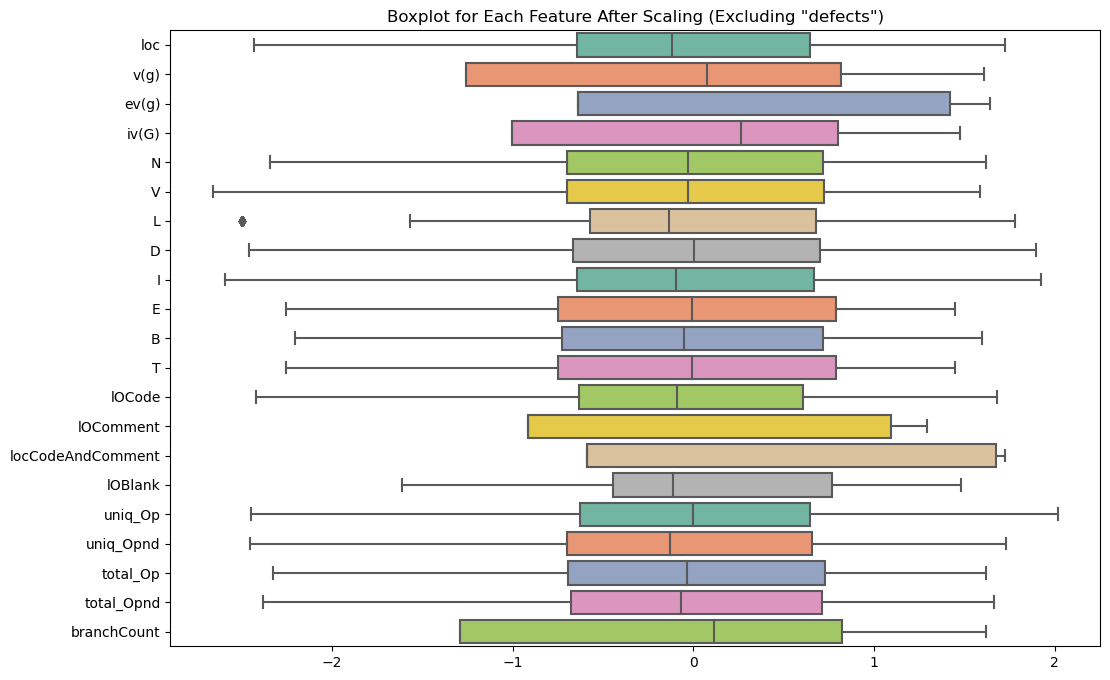

In [18]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'transformed_data' is the DataFrame after skewness correction

# Select features to scale, excluding 'defects'
features_to_scale = [col for col in transformed_data.columns if col != 'defects']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features to scale
scaled_features = scaler.fit_transform(transformed_data[features_to_scale])

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale)

# Add the 'defects' column back into the DataFrame
scaled_data = pd.concat([scaled_features_df, transformed_data['defects'].reset_index(drop=True)], axis=1)

# Visualize the scaled data using boxplots for all columns except 'defects'
plt.figure(figsize=(12, 8))
sns.boxplot(data=scaled_features_df, orient='h', palette="Set2")
plt.title('Boxplot for Each Feature After Scaling (Excluding "defects")')
plt.show()


!
Based on the standard deviations presented in your results, it's clear that the features in your dataset have varying scales. For example, the standard deviation of the feature e is significantly higher than that of the feature loc. This indicates that the magnitude and variance of the dataset's features differ, which can impact the performance of certain machine learning algorithms, especially those sensitive to feature scaling (e.g., SVM, k-NN, and gradient descent-based algorithms like linear regression and neural networks).

Decision to Scale
Due to the varying scales of the features, scaling the dataset is a recommended step to normalize the range of independent variables or features.


In [19]:
import pandas as pd


# Check the size of the dataset
print(f"Dataset size: {scaled_data.shape}")

# Make sure that there are more than a handful of rows
if transformed_data.shape[0] > 10:  # This is just an arbitrary low number for demonstration purposes
    print("Dataset has sufficient rows.")
else:
    print("Dataset may not have enough rows. Check preprocessing steps.")

Dataset size: (1109, 22)
Dataset has sufficient rows.


In [20]:
scaled_data.head(100)

,loc,v(g),ev(g),iv(G),N,V,L,D,I,E,...,lOCode,lOComment,locCodeAndComment,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,-1.641588,-0.831762,0.461972,-0.327741,-2.251815,-2.160834,1.780558,-1.550274,-1.994888,-1.954886,...,-1.399404,0.878106,1.715577,-0.112835,-2.355976,-1.572378,-2.242518,-1.615982,-1.002515,1
1,-1.675930,-1.261703,-0.639850,-1.004103,-2.345293,-2.206981,1.780558,-1.656622,-2.071381,-1.979966,...,-1.682643,0.698094,1.676134,-0.446023,-2.452023,-1.642112,-2.327454,-1.671099,-1.291606,0
2,1.724245,1.224638,1.421605,0.260847,1.621680,1.584884,-0.750373,1.146561,1.752590,1.448373,...,1.679776,1.293464,1.724819,1.481432,1.884594,1.732749,1.619319,1.662844,1.223644,0
3,1.724245,1.608474,1.609766,1.475976,1.621680,1.584884,-0.750373,1.185625,1.921758,1.448373,...,1.679776,1.293464,1.724819,1.481432,1.792928,1.732749,1.619319,1.662844,1.617103,0
4,1.724245,1.608474,1.643881,1.475976,1.621680,1.584884,-1.569965,1.897332,1.921758,1.448373,...,1.679776,1.293464,1.724819,1.481432,2.019130,1.732749,1.619319,1.662844,1.617103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.646524,-1.261703,-0.639850,-1.004103,-0.540216,-0.536111,1.270693,-0.908529,0.265788,-0.764746,...,-0.635469,1.224973,-0.586686,0.432802,-0.810462,-0.210832,-0.551036,-0.511927,-1.291606,1
96,-0.447326,-0.396747,-0.639850,-1.004103,-0.565020,-0.580925,1.270693,-0.898397,0.146059,-0.785237,...,-0.429938,0.878106,-0.586686,-0.112835,-1.004985,-0.295326,-0.644646,-0.462534,-0.338253,1
97,-0.357840,-1.261703,-0.639850,-1.004103,-0.446774,-0.428294,0.761369,-0.638680,0.026432,-0.569245,...,-0.337369,1.293464,-0.586686,1.020840,-0.299645,-0.210832,-0.386516,-0.511927,-1.291606,1
98,-0.646524,-1.261703,-0.639850,-1.004103,-0.540216,-0.536111,1.270693,-0.908529,0.265788,-0.764746,...,-0.635469,1.224973,-0.586686,0.432802,-0.810462,-0.210832,-0.551036,-0.511927,-1.291606,1


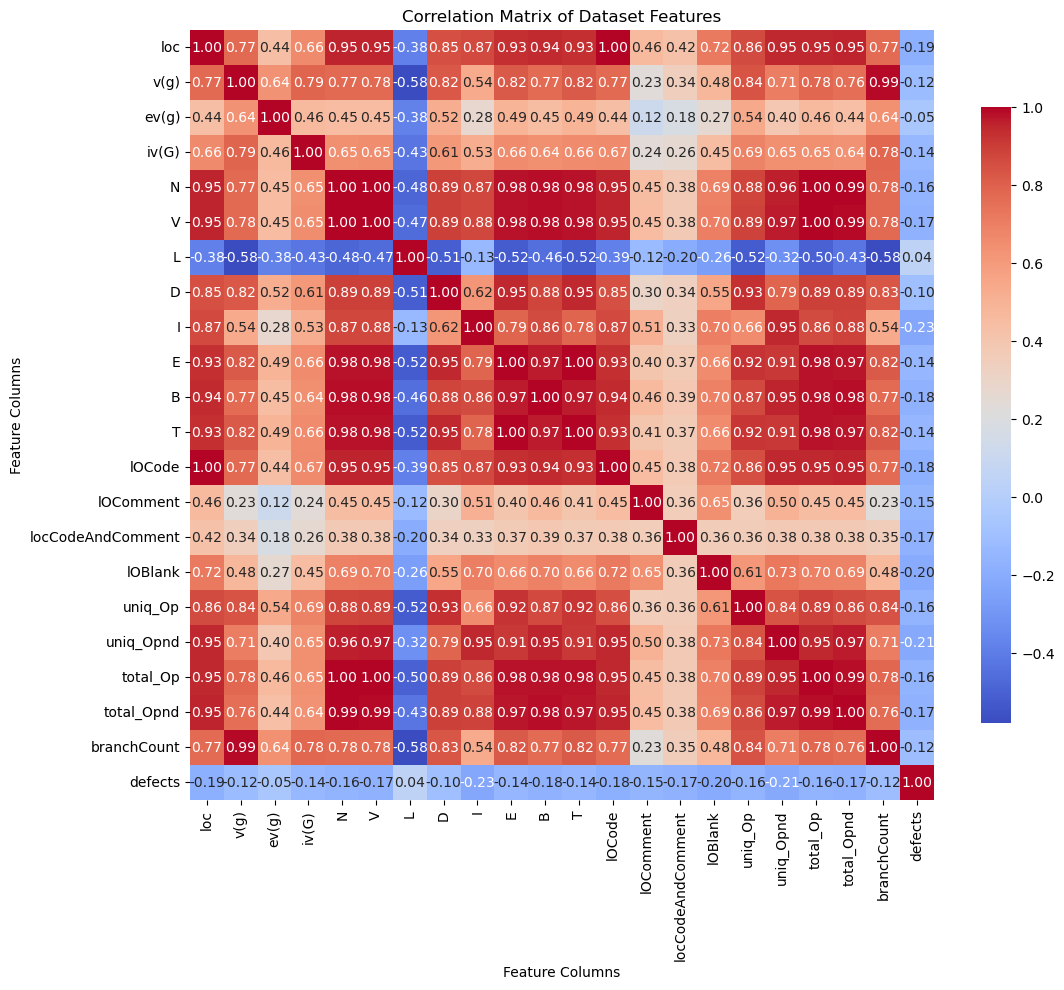

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr_matrix = scaled_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})

# Adding titles and labels for clarity
plt.title('Correlation Matrix of Dataset Features')
plt.xlabel('Feature Columns')
plt.ylabel('Feature Columns')
plt.show()



In [23]:
# Columns to remove
columns_to_remove = ['v(g)', 'iv(G)', 'B', 'locCodeAndComment','lOComment', 'lOBlank']

# Removing the specified columns from the dataframe
df_cleaned = scaled_data.drop(columns=columns_to_remove)

# Display the first few rows of the cleaned dataframe to confirm removal
df_cleaned.head()


,loc,ev(g),N,V,L,D,I,E,T,lOCode,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,-1.641588,0.461972,-2.251815,-2.160834,1.780558,-1.550274,-1.994888,-1.954886,-1.567579,-1.399404,-2.355976,-1.572378,-2.242518,-1.615982,-1.002515,1
1,-1.675930,-0.639850,-2.345293,-2.206981,1.780558,-1.656622,-2.071381,-1.979966,-1.613817,-1.682643,-2.452023,-1.642112,-2.327454,-1.671099,-1.291606,0
2,1.724245,1.421605,1.621680,1.584884,-0.750373,1.146561,1.752590,1.448373,1.448951,1.679776,1.884594,1.732749,1.619319,1.662844,1.223644,0
3,1.724245,1.609766,1.621680,1.584884,-0.750373,1.185625,1.921758,1.448373,1.448951,1.679776,1.792928,1.732749,1.619319,1.662844,1.617103,0
4,1.724245,1.643881,1.621680,1.584884,-1.569965,1.897332,1.921758,1.448373,1.448951,1.679776,2.019130,1.732749,1.619319,1.662844,1.617103,0


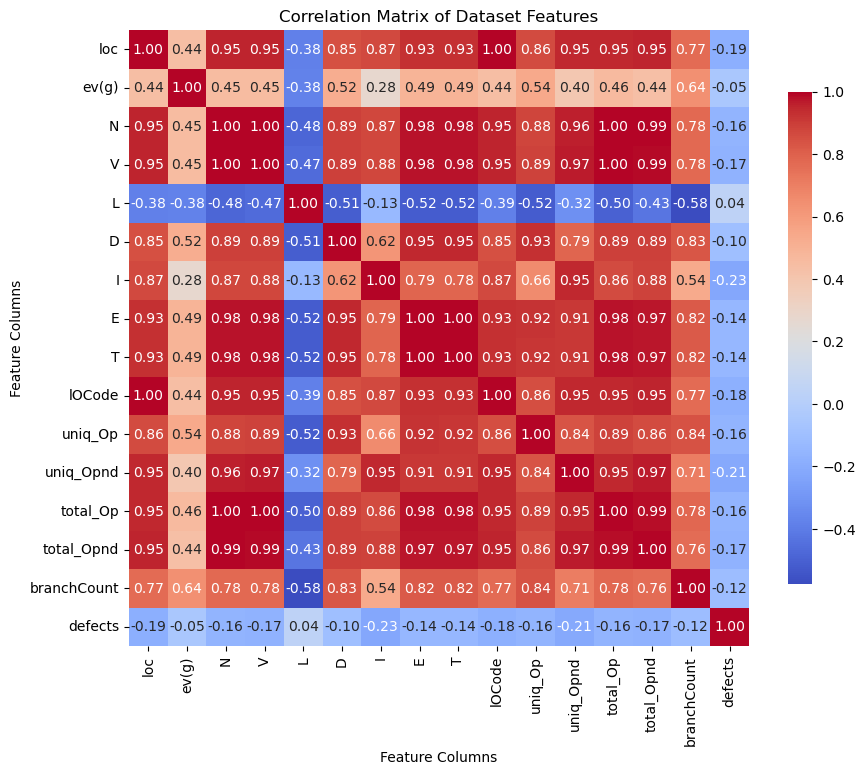

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})

# Adding titles and labels for clarity
plt.title('Correlation Matrix of Dataset Features')
plt.xlabel('Feature Columns')
plt.ylabel('Feature Columns')
plt.show()

In [26]:
import pandas as pd

# Check the count of 0s and 1s in the 'defect' column
defect_counts = df_cleaned['defects'].value_counts()

# Print the counts
print(defect_counts)


1    1032
0      77
Name: defects, dtype: int64


In [27]:
import numpy as np
from sklearn.impute import SimpleImputer

# Replace '?' with NaN
df_cleaned.replace('?', np.nan, inplace=True)

# Use SimpleImputer to fill in missing values with the median of each column
imputer = SimpleImputer(strategy='median')

# Assuming all columns except 'defects' are numeric
# Fit the imputer on the data and transform it
X_imputed = imputer.fit_transform(df_cleaned.drop('defects', axis=1))

# Update the DataFrame with the imputed data
df_cleaned.iloc[:, df_cleaned.columns != 'defects'] = X_imputed

# Now, you can proceed with your analysis or modeling

APPLYING SMMOTE TO THE TRAINING DATA

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'defects' is correctly converted to 0 and 1
X = df_cleaned.drop('defects', axis=1)  # Features
y = df_cleaned['defects']  # Target

# Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)

# Applying SMOTE to the training data
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Creating a new DataFrame for the balanced dataset
df_smote = pd.DataFrame(X_smote, columns=X_train.columns)
df_smote['defects'] = y_smote

# Now df_smote contains your balanced dataset including the target variable
print(df_smote.head())


        loc     ev(g)         N         V         L         D         I  \
0 -1.191042 -0.639850 -1.497630 -1.440091  1.780558 -1.347675 -0.953191   
1 -0.543113 -0.639850 -0.361234 -0.368970 -0.266797  0.207076 -0.779695   
2  1.724245  1.643881  1.621680  1.584884 -1.216777  1.802816  1.921758   
3  1.724245 -0.639850  1.621680  1.584884 -1.216777  1.897332  0.677417   
4  1.724245  1.643881  1.621680  1.584884 -0.750373  1.128255  1.921758   

          E         T    lOCode   uniq_Op  uniq_Opnd  total_Op  total_Opnd  \
0 -1.465113 -1.468668 -1.193011 -1.451538  -1.140418 -1.599055   -1.285567   
1 -0.159532 -0.159988 -0.528863  0.137581  -0.586215 -0.313155   -0.415502   
2  1.448373  1.448951  1.679776  1.507457   1.732749  1.619319    1.662844   
3  1.448373  1.448951  1.679776  2.019130   1.356512  1.619319    1.641227   
4  1.448373  1.448951  1.679776  1.098170   1.732749  1.619319    1.662844   

   branchCount  defects  
0    -1.291606        1  
1     0.114407        1  
2 

In [29]:
import pandas as pd

# Check the count of 0s and 1s in the 'defect' column
defect_counts = df_smote['defects'].value_counts()

# Print the counts
print(defect_counts)


1    829
0    829
Name: defects, dtype: int64


In [30]:
df_smote.shape


(1658, 16)

In [120]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assume 'df_smote' is your DataFrame after applying SMOTE, with the last column being the target
X = df_smote.iloc[:, :-1]  # Features
y = df_smote.iloc[:, -1]   # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on both the training and test sets
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Calculate the accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Report the classification report for test set
test_classification_report = classification_report(y_test, y_test_pred)

# Cross-validation scores can give a better indication of how the model will perform on unseen data
cross_val_scores = cross_val_score(classifier, X, y, cv=5)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Classification Report (Test Set):\n{test_classification_report}")
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean CV Score: {cross_val_scores.mean()}")

# Evaluate overfitting or underfitting
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("The model might be underfitting.")
else:
    print("The model has a balanced fit.")


Training Accuracy: 0.9748953974895398
Test Accuracy: 0.8358846564613741
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1385
           1       0.85      0.82      0.84      1424

    accuracy                           0.84      2809
   macro avg       0.84      0.84      0.84      2809
weighted avg       0.84      0.84      0.84      2809

Cross-Validation Scores: [0.78106088 0.84051264 0.86004274 0.86930199 0.8707265 ]
Mean CV Score: 0.8443289477554341
The model might be overfitting.


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score

# # Assuming 'df_smote' is your DataFrame
# X = df_smote.iloc[:, :-1]
# y = df_smote.iloc[:, -1]

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # Create a RandomForestClassifier object with parameters to help mitigate overfitting
# classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, 
#                                     min_samples_leaf=4, random_state=42)

# # Train the classifier
# classifier.fit(X_train, y_train)

# # Predict on the test data
# y_test_pred = classifier.predict(X_test)

# # Evaluate the new model
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print(f"New Test Accuracy: {test_accuracy}")



RANDOM FORSET CLASSIFIER

In [238]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming 'df_smote' is your DataFrame
X = df_smote.iloc[:, :-1]
y = df_smote.iloc[:, -1]

# Split the data into training and test sets with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a RandomForestClassifier object with parameters to help mitigate overfitting
classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10,
                                    min_samples_leaf=4, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict on the training data
y_train_pred = classifier.predict(X_train)

# Predict on the test data
y_test_pred = classifier.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# If the training and test accuracy are close, it is a good sign that overfitting has been reduced
if abs(train_accuracy - test_accuracy) < 0.05:  # Threshold of 0.05 is arbitrary, adjust as needed
    print("The model is likely not overfitting.")
else:
    print("There may still be some overfitting.")


Training Accuracy: 0.8151873942846969
Test Accuracy: 0.7568529725881097
There may still be some overfitting.


In [32]:
# import matplotlib.pyplot as plt

# # Sample data from the provided results
# training_accuracy = 0.85
# test_accuracy = 0.83

# # Create a bar chart to visualize the training and testing accuracies
# plt.figure(figsize=(10, 6))

# # Define the bar positions
# bar_positions = [0, 1]

# # Plot both accuracies
# plt.bar(bar_positions, [training_accuracy, test_accuracy], color=['blue', 'orange'], width=0.6)

# # Add the accuracy values on top of the bars
# for i, acc in enumerate([training_accuracy, test_accuracy]):
#     plt.text(i, acc, str(round(acc, 2)), ha='center', va='bottom')

# # Set the xticks to be the names of the models
# plt.xticks(bar_positions, ['Training Accuracy', 'Test Accuracy'])

# # Add labels and title
# plt.ylabel('Accuracy')
# plt.title('Training vs Testing Accuracy')

# # Show the plot
# plt.show()


In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# # Split your previously split training data (X_train, y_train) into training and validation sets
# X_train_sub, X_validation, y_train_sub, y_validation = train_test_split(
#     X_train, y_train, test_size=0.2, random_state=42
# )

# # Initialize the Decision Tree Classifier
# decision_tree = DecisionTreeClassifier(random_state=42)

# # Train the classifier on the training subset
# decision_tree.fit(X_train_sub, y_train_sub)

# # Make predictions on the validation subset
# y_validation_pred = decision_tree.predict(X_validation)

# # Make predictions on the test set
# y_test_pred = decision_tree.predict(X_test)

# # Calculate and print the accuracy, F-1 score, precision, and recall for validation
# validation_accuracy = accuracy_score(y_validation, y_validation_pred)
# validation_f1 = f1_score(y_validation, y_validation_pred, average='weighted')
# validation_precision = precision_score(y_validation, y_validation_pred, average='weighted')
# validation_recall = recall_score(y_validation, y_validation_pred, average='weighted')

# # Calculate and print the accuracy, F-1 score, precision, and recall for test
# test_accuracy = accuracy_score(y_test, y_test_pred)
# test_f1 = f1_score(y_test, y_test_pred, average='weighted')
# test_precision = precision_score(y_test, y_test_pred, average='weighted')
# test_recall = recall_score(y_test, y_test_pred, average='weighted')

# print("Validation Set Metrics:")
# print(f"Accuracy: {validation_accuracy}")
# print(f"F1 Score: {validation_f1}")
# print(f"Precision: {validation_precision}")
# print(f"Recall: {validation_recall}")

# print("\nTest Set Metrics:")
# print(f"Accuracy: {test_accuracy}")
# print(f"F1 Score: {test_f1}")
# print(f"Precision: {test_precision}")
# print(f"Recall: {test_recall}")


DECISION TREE

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Assuming you've already split your data
# X_train, X_test, y_train, y_test
# X_train_sub, X_validation, y_train_sub, y_validation

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the subset of the training data
dt_classifier.fit(X_train_sub, y_train_sub)

# Make predictions on the training subset
y_train_sub_pred = dt_classifier.predict(X_train_sub)

# Make predictions on the validation subset
y_validation_pred = dt_classifier.predict(X_validation)

# Make predictions on the full training set
y_train_pred = dt_classifier.predict(X_train)

# Make predictions on the test set
y_test_pred = dt_classifier.predict(X_test)

# Compute metrics for the training subset
train_sub_accuracy = accuracy_score(y_train_sub, y_train_sub_pred)
train_sub_f1 = f1_score(y_train_sub, y_train_sub_pred, average='weighted')
train_sub_precision = precision_score(y_train_sub, y_train_sub_pred, average='weighted')
train_sub_recall = recall_score(y_train_sub, y_train_sub_pred, average='weighted')

# Compute metrics for the validation subset
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
validation_f1 = f1_score(y_validation, y_validation_pred, average='weighted')
validation_precision = precision_score(y_validation, y_validation_pred, average='weighted')
validation_recall = recall_score(y_validation, y_validation_pred, average='weighted')


# Compute metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

# Output the computed metrics
print(f"Training Subset Metrics:")
print(f"Accuracy: {train_sub_accuracy}")
print(f"F1 Score: {train_sub_f1}")
print(f"Precision: {train_sub_precision}")
print(f"Recall: {train_sub_recall}")

print("\nValidation Metrics:")
print(f"Accuracy: {validation_accuracy}")
print(f"F1 Score: {validation_f1}")
print(f"Precision: {validation_precision}")
print(f"Recall: {validation_recall}")

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")


NameError: name 'X_train_sub' is not defined

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Assuming X_train, X_test, y_train, y_test have been defined previously

# Split the training data into a training subset and validation set
X_train_sub, X_validation, y_train_sub, y_validation = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier on the training subset
dt_classifier.fit(X_train_sub, y_train_sub)

# Make predictions on the training subset
y_train_sub_pred = dt_classifier.predict(X_train_sub)

# Make predictions on the validation subset
y_validation_pred = dt_classifier.predict(X_validation)

# Make predictions on the full training set
y_train_pred = dt_classifier.predict(X_train)

# Make predictions on the test set
y_test_pred = dt_classifier.predict(X_test)

# Compute metrics for the training subset
train_sub_accuracy = accuracy_score(y_train_sub, y_train_sub_pred)
train_sub_f1 = f1_score(y_train_sub, y_train_sub_pred, average='weighted')
train_sub_precision = precision_score(y_train_sub, y_train_sub_pred, average='weighted')
train_sub_recall = recall_score(y_train_sub, y_train_sub_pred, average='weighted')

# Compute metrics for the validation subset
validation_accuracy = accuracy_score(y_validation, y_validation_pred)
validation_f1 = f1_score(y_validation, y_validation_pred, average='weighted')
validation_precision = precision_score(y_validation, y_validation_pred, average='weighted')
validation_recall = recall_score(y_validation, y_validation_pred, average='weighted')

# Compute metrics for the full training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')

# Compute metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

# Output the computed metrics
print("Training Subset Metrics:")
print(f"Accuracy: {train_sub_accuracy}")
print(f"F1 Score: {train_sub_f1}")
print(f"Precision: {train_sub_precision}")
print(f"Recall: {train_sub_recall}")

print("\nValidation Metrics:")
print(f"Accuracy: {validation_accuracy}")
print(f"F1 Score: {validation_f1}")
print(f"Precision: {validation_precision}")
print(f"Recall: {validation_recall}")

print("\nFull Training Set Metrics:")
print(f"Accuracy: {train_accuracy}")
print(f"F1 Score: {train_f1}")
print(f"Precision: {train_precision}")
print(f"Recall: {train_recall}")

print("\nTest Set Metrics:")
print(f"Accuracy: {test_accuracy}")
print(f"F1 Score: {test_f1}")
print(f"Precision: {test_precision}")
print(f"Recall: {test_recall}")


Training Subset Metrics:
Accuracy: 0.9929478138222849
F1 Score: 0.9929807576163162
Precision: 0.993028159518525
Recall: 0.9929478138222849

Validation Metrics:
Accuracy: 0.898876404494382
F1 Score: 0.9036316211878009
Precision: 0.9085526597469005
Recall: 0.898876404494382

Full Training Set Metrics:
Accuracy: 0.9740698985343855
F1 Score: 0.9743732469503229
Precision: 0.9747497459410421
Recall: 0.9740698985343855

Test Set Metrics:
Accuracy: 0.8963963963963963
F1 Score: 0.8814433877167572
Precision: 0.8710776814550399
Recall: 0.8963963963963963


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Load your data (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Setup a parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],  # None means unlimited depth
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best estimator found by GridSearchCV
best_dt = grid_search.best_estimator_

# Predictions and evaluation
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Optimized Training Accuracy: {train_accuracy}")
print(f"Optimized Testing Accuracy: {test_accuracy}")
print(f"Best Parameters: {grid_search.best_params_}")


Optimized Training Accuracy: 0.9346110484780158
Optimized Testing Accuracy: 0.9054054054054054
Best Parameters: {'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Setup a more conservative parameter grid for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10],  # More conservative depths
    'min_samples_split': [20, 40, 60],  # Higher values
    'min_samples_leaf': [10, 20, 30],  # Higher values
    'max_leaf_nodes': [None, 50, 100]  # Adding max_leaf_nodes
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best estimator found by GridSearchCV
best_dt = grid_search.best_estimator_

# Predictions and evaluation
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Further Optimized Training Accuracy: {train_accuracy}")
print(f"Further Optimized Testing Accuracy: {test_accuracy}")
print(f"Best Parameters: {grid_search.best_params_}")


Further Optimized Training Accuracy: 0.9346110484780158
Further Optimized Testing Accuracy: 0.9144144144144144
Best Parameters: {'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 30, 'min_samples_split': 20}


In [33]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Let's assume that y_test and y_test_pred are already defined in your environment:
# # y_test would be the true labels from the test set
# # y_test_pred would be the predictions made by your model on the test set

# # Calculate the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_test_pred)

# # Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted label')
# plt.ylabel('True label')
# plt.show()


In [ ]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Ensure the model can calculate probabilities
# if hasattr(dt_classifier, "predict_proba"):
#     y_test_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]  # Get the probability of the positive class

#     # Calculate the ROC curve
#     fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

#     # Calculate the AUC
#     roc_auc = auc(fpr, tpr)

#     # Plot the ROC curve
#     plt.figure(figsize=(8, 8))
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic')
#     plt.legend(loc="lower right")
#     plt.show()
# else:
#     print("Decision Tree model is not set to output probabilities. Adjust the model configuration.")


In [ ]:
# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# # Assuming y_test_prob contains the probabilities for the positive class
# fpr, tpr, thresholds = roc_curve(y_test, y_test_pred[:, 1])
# auc = roc_auc_score(y_test, y_test_pred[:, 1])

# # Plotting the ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc)
# plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc='lower right')
# plt.show()
# print('ROC-AUC curve plotted with AUC:', auc)

In [40]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Ensure you have prediction probabilities for the positive class
# if hasattr(decision_tree, "predict_proba"):
#     y_test_pred_proba = decision_tree.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

#     # Calculate the ROC curve
#     fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)

#     # Calculate the AUC (Area Under Curve)
#     roc_auc = auc(fpr, tpr)

#     # Plot the ROC curve
#     plt.figure(figsize=(6, 4))
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Decision Tree')
#     plt.legend(loc="lower right")
#     plt.show()
# else:
#     print("Your Decision Tree model does not support probability predictions. Adjust the model configuration.")


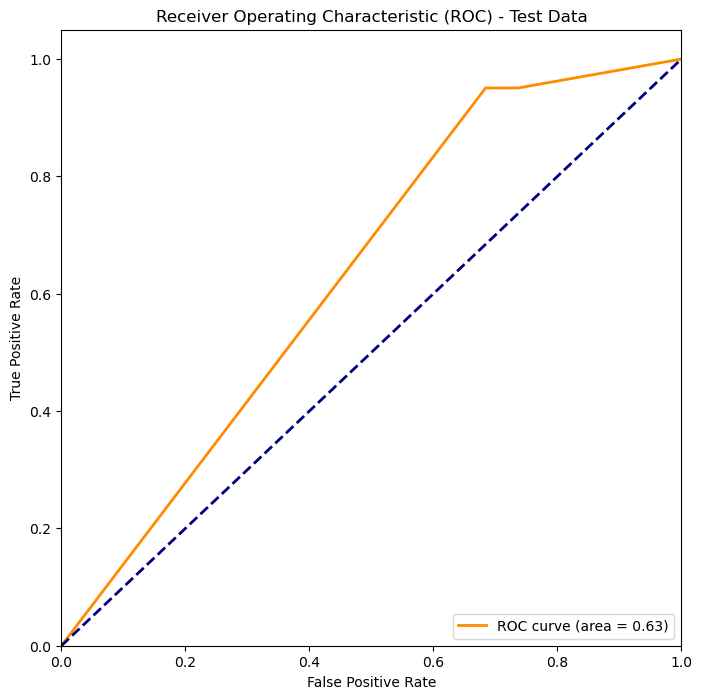

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure the decision tree model and data are properly configured
if hasattr(decision_tree, "predict_proba"):
    # Predict probabilities for the test set
    y_test_pred_proba = decision_tree.predict_proba(X_test)[:, 1]

    # Check if the length of y_test and y_test_pred_proba match
    if len(y_test) == len(y_test_pred_proba):
        # Calculate the ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)

        # Calculate the AUC (Area Under Curve)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - Test Data')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f"Mismatch in the number of samples: y_test has {len(y_test)}, y_test_pred_proba has {len(y_test_pred_proba)}")
else:
    print("Your Decision Tree model does not support probability predictions. Adjust the model configuration.")


The lengths match. Proceeding with further analysis.


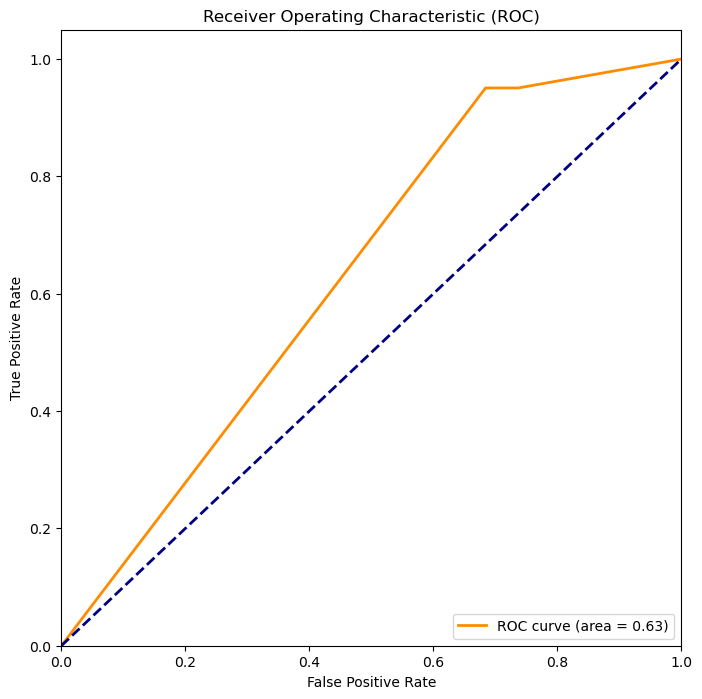

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming the Decision Tree model and the train-test split have already been defined
# For demonstration, we assume these variables are correctly set:
# decision_tree, X_train, X_test, y_train, y_test

# Train the classifier on the training data
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict probabilities for the test set
if hasattr(decision_tree, "predict_proba"):
    y_test_pred_proba = decision_tree.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    
    # Verify that the length of y_test matches y_test_pred_proba
    if len(y_test) == len(y_test_pred_proba):
        print("The lengths match. Proceeding with further analysis.")
        
        # Calculate the ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
        roc_auc = auc(fpr, tpr)
        
        # Plot the ROC curve
        plt.figure(figsize=(8, 8))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print(f"Length mismatch: y_test has {len(y_test)} samples, y_test_pred_proba has {len(y_test_pred_proba)} samples.")
else:
    print("This model does not support probability predictions.")


Random Forest

In [177]:
# X = df_smote.drop('defects', axis=1)  # Drop the target column to isolate features
# y = df_smote['defects']  # Isolate the target column
# from sklearn.ensemble import RandomForestClassifier

# # Initialize the Random Forest classifier
# random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # You can tune these parameters

# # Train the model
# random_forest.fit(X_train, y_train)

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Make predictions on the test set
# y_pred = random_forest.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# # Print the evaluation metrics
# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")


In [178]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Assuming df_smote is your DataFrame and 'defects' is the target variable
# X = df_smote.drop('defects', axis=1)  # Drop the target column to isolate features
# y = df_smote['defects']  # Isolate the target column

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Initialize the Random Forest classifier with 100 trees
# random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the model on the training data
# random_forest.fit(X_train, y_train)

# # Make predictions on both the training and testing sets
# y_train_pred = random_forest.predict(X_train)
# y_test_pred = random_forest.predict(X_test)

# # Calculate accuracy for both the training and testing sets
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# # Calculate other performance metrics for the testing set
# test_precision = precision_score(y_test, y_test_pred, average='weighted')
# test_recall = recall_score(y_test, y_test_pred, average='weighted')
# test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# # Print the evaluation metrics
# print(f"Training Accuracy: {train_accuracy}")
# print(f"Testing Accuracy: {test_accuracy}")
# print(f"Precision: {test_precision}")
# print(f"Recall: {test_recall}")
# print(f"F1 Score: {test_f1}")


RANDOM FOREST CLASSIFIER

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

# Load and prepare your data
X = df_smote.drop('defects', axis=1)
y = df_smote['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForest classifier with new parameters
random_forest = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=10,
    random_state=42
)

# Train the model
random_forest.fit(X_train, y_train)

# Evaluate the model on training data
y_train_pred = random_forest.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Evaluate the model on testing data
y_test_pred = random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Cross-validation to check for consistency across folds
cv_scores = cross_val_score(random_forest, X, y, cv=5)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")



Training Accuracy: 0.9555052790346908
Testing Accuracy: 0.9216867469879518
Cross-validation Scores: [0.88855422 0.93674699 0.93674699 0.92749245 0.89425982]
Mean CV Accuracy: 0.9167600917264224


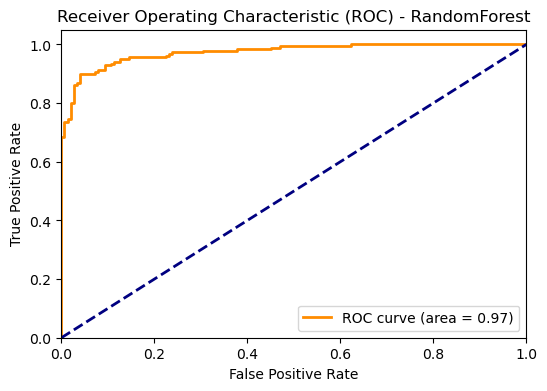

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure the RandomForest model is capable of predicting probabilities
if hasattr(random_forest, "predict_proba"):
    try:
        # Get the prediction probabilities for the positive class
        y_test_pred_proba = random_forest.predict_proba(X_test)[:, 1]  # Ensure correct indexing

        # Calculate the ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

        # Calculate the AUC (Area Under Curve)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - RandomForest')
        plt.legend(loc="lower right")
        plt.show()
    except Exception as e:
        print(f"An error occurred while generating ROC curve: {str(e)}")
else:
    print("This RandomForest model does not support probability predictions in the format needed for ROC curves.")


In [43]:
from sklearn.model_selection import cross_val_score

# Initialize the model with potentially better regularization
random_forest = RandomForestClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=4, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(random_forest, X, y, cv=5)  # 5-fold cross-validation

# Fit the model to the full training data and evaluate on the test set
random_forest.fit(X_train, y_train)
y_test_pred = random_forest.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")
print(f"Test Accuracy: {test_accuracy}")


Cross-Validation Accuracy Scores: [0.87650602 0.93674699 0.93072289 0.9305136  0.90936556]
Mean CV Accuracy: 0.9167710115386015
Test Accuracy: 0.9337349397590361


In [175]:
# from sklearn.feature_selection import SelectFromModel

# # Train the model to evaluate feature importances
# random_forest.fit(X_train, y_train)

# # Create a selector object that uses the random forest classifier to identify important features
# selector = SelectFromModel(random_forest, prefit=True)

# # Transform the training and testing sets to reduce to the selected features
# X_train_reduced = selector.transform(X_train)
# X_test_reduced = selector.transform(X_test)

# # Re-train the model on the reduced feature set and evaluate performance
# random_forest.fit(X_train_reduced, y_train)
# y_test_pred = random_forest.predict(X_test_reduced)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print(f"Test Accuracy with Reduced Features: {test_accuracy}")


In [174]:
# # Adjust max_depth
# random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
# random_forest.fit(X_train, y_train)
# y_test_pred = random_forest.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print(f"Test Accuracy with Adjusted Tree Depth: {test_accuracy}")


In [173]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.feature_selection import SelectFromModel

# # Assume X_train, y_train, X_test, y_test have been defined and Random Forest has been initialized
# random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# # Train the model to evaluate feature importances
# random_forest.fit(X_train, y_train)

# # Create a selector object that uses the random forest classifier to identify important features
# selector = SelectFromModel(random_forest, prefit=True)

# # Transform the training and testing sets to reduce to the selected features
# X_train_reduced = selector.transform(X_train)
# X_test_reduced = selector.transform(X_test)

# # Re-train the model on the reduced feature set
# random_forest.fit(X_train_reduced, y_train)

# # Make predictions on the reduced training and testing sets
# y_train_pred = random_forest.predict(X_train_reduced)
# y_test_pred = random_forest.predict(X_test_reduced)

# # Calculate accuracy for both the reduced training and testing sets
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# # Print the evaluation metrics
# print(f"Training Accuracy with Reduced Features: {train_accuracy}")
# print(f"Test Accuracy with Reduced Features: {test_accuracy}")


In [172]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.feature_selection import SelectFromModel

# # Initialize a Random Forest classifier with modified parameters to reduce complexity
# random_forest = RandomForestClassifier(n_estimators=50, min_samples_split=10, min_samples_leaf=4, max_depth=10, random_state=42)

# # Train the model on the full training data
# random_forest.fit(X_train, y_train)

# # Create a selector object to identify important features based on the less complex model
# selector = SelectFromModel(random_forest, prefit=True)

# # Transform the training and testing sets to include only the selected important features
# X_train_reduced = selector.transform(X_train)
# X_test_reduced = selector.transform(X_test)

# # Re-train the model on the reduced feature set
# random_forest.fit(X_train_reduced, y_train)

# # Make predictions on the reduced training and testing sets
# y_train_pred = random_forest.predict(X_train_reduced)
# y_test_pred = random_forest.predict(X_test_reduced)

# # Calculate accuracy for both the reduced training and testing sets
# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# # Print the evaluation metrics
# print(f"Training Accuracy with Reduced Features: {train_accuracy}")
# print(f"Test Accuracy with Reduced Features: {test_accuracy}")


In [171]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Check if the model and data are prepared for predicting probabilities
# if hasattr(random_forest, "predict_proba") and 'X_test_reduced' in locals():
#     try:
#         # Get prediction probabilities for the positive class
#         y_test_pred_proba = random_forest.predict_proba(X_test_reduced)[:, 1]

#         # Calculate the ROC curve
#         fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

#         # Calculate the AUC (Area Under Curve)
#         roc_auc = auc(fpr, tpr)

#         # Plot the ROC curve
#         plt.figure(figsize=(6, 4))
#         plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#         plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#         plt.xlim([0.0, 1.0])
#         plt.ylim([0.0, 1.05])
#         plt.xlabel('False Positive Rate')
#         plt.ylabel('True Positive Rate')
#         plt.title('Receiver Operating Characteristic (ROC) - RandomForest with Reduced Features')
#         plt.legend(loc="lower right")
#         plt.show()
#     except Exception as e:
#         print(f"An error occurred while generating ROC curve: {str(e)}")
# else:
#     print("Model does not support probability predictions or test data is not defined.")


In [149]:
# random_forest = RandomForestClassifier(
#     n_estimators=80,
#     min_samples_split=10,
#     min_samples_leaf=4,
#     max_features='sqrt',
#     random_state=42
# )

# random_forest.fit(X_train, y_train)
# y_train_pred = random_forest.predict(X_train)
# y_test_pred = random_forest.predict(X_test)

# new_train_accuracy = accuracy_score(y_train, y_train_pred)
# new_test_accuracy = accuracy_score(y_test, y_test_pred)

# print(f"New Training Accuracy: {new_train_accuracy}")
# print(f"New Testing Accuracy: {new_test_accuracy}")


In [234]:
# from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

# # Ensure that X_test and y_test are properly defined in your environment
# # Also, ensure the RandomForest model has been trained with 'random_forest.fit(X_train, y_train)'

# # Predict probabilities for the positive class
# y_pred_proba = random_forest.predict_proba(X_test)[:, 1]  # Assuming class 1 is the positive class

# # Calculate the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# # Calculate the AUC (Area Under Curve)
# roc_auc = auc(fpr, tpr)

# # Plot the ROC curve
# plt.figure(figsize=(6, 4))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) - RandomForest')
# plt.legend(loc="lower right")
# plt.show()


KNN Model

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt


In [138]:
# # Assuming df_smote is already defined and includes the feature and target data
# X = df_smote.drop('defects', axis=1)
# y = df_smote['defects']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the KNN model
# knn = KNeighborsClassifier(n_neighbors=5)

# # Train the model
# knn.fit(X_train, y_train)

# # Make predictions
# y_pred = knn.predict(X_test)
# y_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")

# # Calculate ROC curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(6, 4))
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()


C:\Users\kushagra vashistha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\kushagra vashistha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False 

Training Accuracy: 0.889894419306184
Testing Accuracy: 0.8524096385542169

Test Metrics:
Precision: 0.8778251398450947
Recall: 0.8524096385542169
F1 Score: 0.8518050841550449


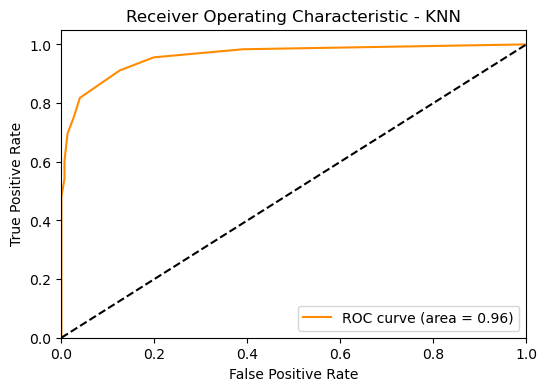

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Load and prepare your data
# Assuming df_smote is your DataFrame containing the features and the target variable 'defects'
X = df_smote.drop('defects', axis=1)
y = df_smote['defects']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

# Make predictions on the training set and test set
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate accuracy for both the training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output training and testing accuracy
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Evaluate further metrics for the test set
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"\nTest Metrics:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Calculate ROC curve and AUC for the test set
y_test_pred_proba = knn.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve for the test set
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()


In [46]:
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)

# Printing cross-validation results
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation in CV Accuracy:", cv_scores.std())


Training Accuracy: 0.889894419306184
Testing Accuracy: 0.8524096385542169
Cross-validation Accuracy Scores: [0.85542169 0.87048193 0.87349398 0.88519637 0.82477341]
Mean CV Accuracy: 0.8618734757762165
Standard Deviation in CV Accuracy: 0.020838134521148636


C:\Users\kushagra vashistha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\kushagra vashistha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False 

GNB

In [165]:
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import GaussianNB
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Assume df_smote is defined as your DataFrame
# X = df_smote.drop('defects', axis=1)  # Drop the target column to isolate features
# y = df_smote['defects']  # Isolate the target column

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the Gaussian Naive Bayes model
# gnb = GaussianNB()

# # Train the model on the training data
# gnb.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = gnb.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# # Print the evaluation metrics
# print("Testing Metrics:")
# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1 Score: {f1}")

# # Additionally, evaluate the training accuracy for comparison
# y_train_pred = gnb.predict(X_train)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# print(f"Training Accuracy: {train_accuracy}")


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assume df_smote is defined and includes your dataset with features and the target 'defects'
X = df_smote.drop('defects', axis=1)  # Drop the target column to isolate features
y = df_smote['defects']  # Isolate the target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on both the training and testing sets
y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

# Calculate accuracy for both the training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the training and testing accuracy
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Optionally, compute and print additional metrics for the testing set
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("\nTesting Metrics:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Training Accuracy: 0.6259426847662142
Testing Accuracy: 0.6596385542168675

Testing Metrics:
Precision: 0.6598309906291834
Recall: 0.6596385542168675
F1 Score: 0.6597287920228128


In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

# Assuming you have training data in variables X_train, y_train, X_test, y_test

# Enhance features by adding polynomial features
degree = 2  # Increase degree to capture more complex relationships
poly_features = PolynomialFeatures(degree)

# Create a pipeline that first transforms features and then applies GNB
model = make_pipeline(poly_features, GaussianNB())

# Fit the model
model.fit(X_train, y_train)

# Predictions for evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.6613876319758673
Testing Accuracy: 0.6566265060240963


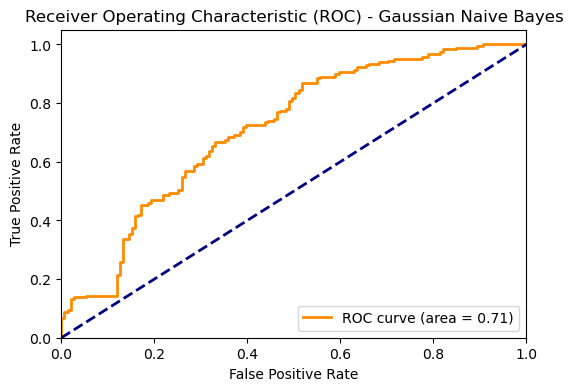

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Check if the model supports probability prediction
if hasattr(gnb, "predict_proba"):
    # Get the prediction probabilities for the positive class
    try:
        y_test_pred_proba = gnb.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

        # Calculate the ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

        # Calculate the AUC (Area Under Curve)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - Gaussian Naive Bayes')
        plt.legend(loc="lower right")
        plt.show()
    except IndexError as e:
        print("An IndexError occurred:", e)
        print("Check the structure of your probability output.")
    except Exception as e:
        print("An unexpected error occurred:", e)
else:
    print("This model does not support probability predictions in a format needed for ROC curves.")


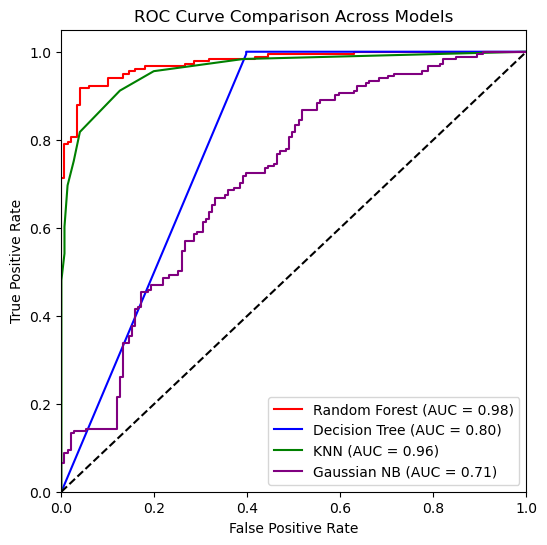

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'X_test' and 'y_test' are defined and ready for evaluation

# Ensure the RandomForest model is capable of predicting probabilities
if hasattr(random_forest, "predict_proba"):
    y_test_pred_proba_rf = random_forest.predict_proba(X_test)[:, 1]

if hasattr(decision_tree, "predict_proba"):
    y_test_pred_proba_dt = decision_tree.predict_proba(X_test)[:, 1]

if hasattr(knn, "predict_proba"):
    y_test_pred_proba_knn = knn.predict_proba(X_test)[:, 1]

if hasattr(gnb, "predict_proba"):
    y_test_pred_proba_gnb = gnb.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_test_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_test_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_test_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_gnb, tpr_gnb, _ = roc_curve(y_test, y_test_pred_proba_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plot all ROC curves on the same graph
plt.figure(figsize=(6, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='red')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})', color='blue')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})', color='green')
plt.plot(fpr_gnb, tpr_gnb, label=f'Gaussian NB (AUC = {roc_auc_gnb:.2f})', color='purple')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison Across Models')
plt.legend(loc="lower right")
plt.show()


Blending Model

In [257]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load and prepare your data
X = df_smote.drop('defects', axis=1)
y = df_smote['defects']

# Split the data into base training/testing sets and meta training/testing sets
X_base_train, X_meta_train, y_base_train, y_meta_train = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the meta training set into meta training and meta testing sets
X_meta_train, X_meta_test, y_meta_train, y_meta_test = train_test_split(X_meta_train, y_meta_train, test_size=0.2, random_state=42)

# Initialize base models
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_knn = KNeighborsClassifier(n_neighbors=5)
model_lr = LogisticRegression(max_iter=1000)

# Train base models on the base training data
model_rf.fit(X_base_train, y_base_train)
model_knn.fit(X_base_train, y_base_train)
model_lr.fit(X_base_train, y_base_train)

# Predict on meta training data
preds_rf = model_rf.predict_proba(X_meta_train)[:, 1]
preds_knn = model_knn.predict_proba(X_meta_train)[:, 1]
preds_lr = model_lr.predict_proba(X_meta_train)[:, 1]

# Combine predictions to create new feature set for meta-model
X_meta_features = np.column_stack((preds_rf, preds_knn, preds_lr))

# Initialize and train meta-model on the predictions of the base models
meta_model = LogisticRegression(max_iter=1000)
meta_model.fit(X_meta_features, y_meta_train)

# Evaluate meta-model on meta testing data
meta_test_features = np.column_stack((
    model_rf.predict_proba(X_meta_test)[:, 1],
    model_knn.predict_proba(X_meta_test)[:, 1],
    model_lr.predict_proba(X_meta_test)[:, 1]
))

# Predictions for final evaluation
meta_predictions = meta_model.predict(meta_test_features)

# Calculate accuracy
test_accuracy = accuracy_score(y_meta_test, meta_predictions)
print(f"Testing Accuracy: {test_accuracy}")

# For training accuracy, use meta_train features
meta_train_features = np.column_stack((
    model_rf.predict_proba(X_meta_train)[:, 1],
    model_knn.predict_proba(X_meta_train)[:, 1],
    model_lr.predict_proba(X_meta_train)[:, 1]
))
meta_train_predictions = meta_model.predict(meta_train_features)
train_accuracy = accuracy_score(y_meta_train, meta_train_predictions)
print(f"Training Accuracy: {train_accuracy}")


Testing Accuracy: 0.8523131672597865
Training Accuracy: 0.835781041388518


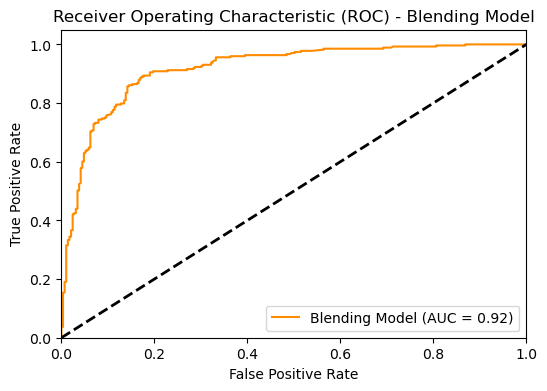

In [258]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming the meta-model and meta_test_features are correctly defined
try:
    # Get the prediction probabilities for the positive class
    y_meta_test_pred_proba = meta_model.predict_proba(meta_test_features)[:, 1]

    # Calculate the ROC curve
    fpr_meta, tpr_meta, _ = roc_curve(y_meta_test, y_meta_test_pred_proba)

    # Calculate the AUC (Area Under Curve)
    roc_auc_meta = auc(fpr_meta, tpr_meta)

    # Plot the ROC curve
    plt.figure(figsize=(6, 4))
    plt.plot(fpr_meta, tpr_meta, label=f'Blending Model (AUC = {roc_auc_meta:.2f})', color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Blending Model')
    plt.legend(loc="lower right")
    plt.show()
except Exception as e:
    print(f"An error occurred while generating ROC curve: {str(e)}")


BAGGING model

In [259]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load and prepare your data
X = df_smote.drop('defects', axis=1)
y = df_smote['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base classifier
tree = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging classifier
bagging = BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=42)

# Train the Bagging classifier
bagging.fit(X_train, y_train)

# Predict on training data
y_train_pred = bagging.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on testing data
y_test_pred = bagging.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.974806374076382
Testing Accuracy: 0.8408686365254538


In [260]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load and prepare your data
X = df_smote.drop('defects', axis=1)
y = df_smote['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base classifier with limited complexity
tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

# Initialize the Bagging classifier with random feature sampling
bagging = BaggingClassifier(
    base_estimator=tree, 
    n_estimators=150, 
    max_features=0.75,
    random_state=42
)

# Train the Bagging classifier
bagging.fit(X_train, y_train)

# Predict on training data
y_train_pred = bagging.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on testing data
y_test_pred = bagging.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.8420724650583103
Testing Accuracy: 0.7910288358846564


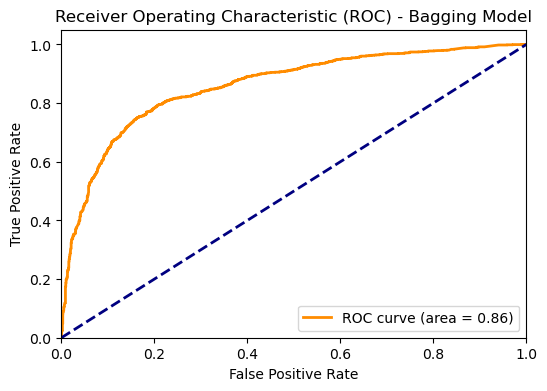

In [261]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure the Bagging model is capable of predicting probabilities
if hasattr(bagging, "predict_proba"):
    try:
        # Get the prediction probabilities for the positive class
        y_test_pred_proba = bagging.predict_proba(X_test)[:, 1]

        # Calculate the ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)

        # Calculate the AUC (Area Under Curve)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - Bagging Model')
        plt.legend(loc="lower right")
        plt.show()
    except Exception as e:
        print(f"An error occurred while generating ROC curve: {str(e)}")
else:
    print("This Bagging model does not support probability predictions in the format needed for ROC curves.")


AdaBOOST model

In [262]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load and prepare your data
X = df_smote.drop('defects', axis=1)
y = df_smote['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoost with a decision tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Using a simple decision tree (stump)
ada_boost = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Train AdaBoost model
ada_boost.fit(X_train, y_train)

# Predict on training data
y_train_pred = ada_boost.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on testing data
y_test_pred = ada_boost.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.6824534852666251
Testing Accuracy: 0.6771092915628337


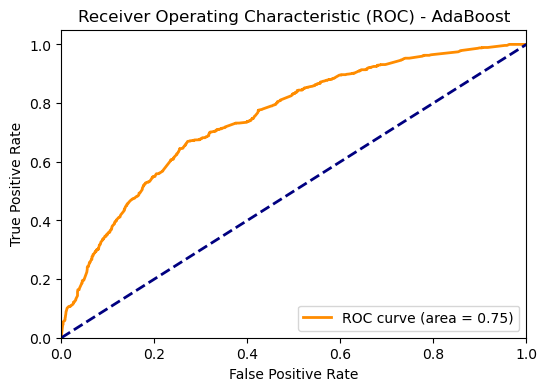

In [263]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure the AdaBoost model is capable of predicting probabilities
if hasattr(ada_boost, "predict_proba"):
    try:
        # Get the prediction probabilities for the positive class
        y_test_pred_proba = ada_boost.predict_proba(X_test)[:, 1]

        # Calculate the ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)

        # Calculate the AUC (Area Under Curve)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - AdaBoost')
        plt.legend(loc="lower right")
        plt.show()
    except Exception as e:
        print(f"An error occurred while generating ROC curve: {str(e)}")
else:
    print("This AdaBoost model does not support probability predictions in the format needed for ROC curves.")


GradientBoosting

In [264]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load and prepare your data
X = df_smote.drop('defects', axis=1)
y = df_smote['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train Gradient Boosting model
gradient_boosting.fit(X_train, y_train)

# Predict on training data
y_train_pred = gradient_boosting.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on testing data
y_test_pred = gradient_boosting.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

print(y_test_pred[:])
print(y_test)

Training Accuracy: 0.7661354936348259
Testing Accuracy: 0.7500889996440014
[0 0 0 ... 1 0 1]
12744    0
13382    0
11239    0
6561     1
12247    0
        ..
9877     0
5871     0
1118     0
12214    0
6108     1
Name: defects, Length: 2809, dtype: int64


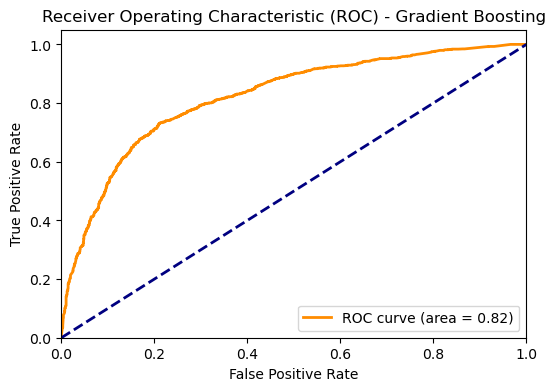

In [265]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Ensure the Gradient Boosting model is capable of predicting probabilities
if hasattr(gradient_boosting, "predict_proba"):
    try:
        # Get the prediction probabilities for the positive class
        y_test_pred_proba = gradient_boosting.predict_proba(X_test)[:, 1]

        # Calculate the ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)

        # Calculate the AUC (Area Under Curve)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - Gradient Boosting')
        plt.legend(loc="lower right")
        plt.show()
    except Exception as e:
        print(f"An error occurred while generating ROC curve: {str(e)}")
else:
    print("This Gradient Boosting model does not support probability predictions in the format needed for ROC curves.")


Voting Classifier

In [266]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Load and prepare your data
X = df_smote.drop('defects', axis=1)
y = df_smote['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual models
model1 = LogisticRegression(max_iter=1000, random_state=42)
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model3 = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create a VotingClassifier with soft voting
voting_clf = VotingClassifier(
    estimators=[('lr', model1), ('rf', model2), ('gb', model3)],
    voting='soft'
)

# Train the VotingClassifier
voting_clf.fit(X_train, y_train)

# Predict on training data
y_train_pred = voting_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on testing data
y_test_pred = voting_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Perform cross-validation
cv_scores = cross_val_score(voting_clf, X, y, cv=5)

# Calculate mean CV score
mean_cv_score = cv_scores.mean()

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean CV Score: {mean_cv_score}")


Training Accuracy: 0.914270453129173
Testing Accuracy: 0.8123887504449983
Cross-validation Scores: [0.73513706 0.80669277 0.82621083 0.82799145 0.83974359]
Mean CV Score: 0.8071551403253074


In [269]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Load and prepare your data
X = df_smote.drop('defects', axis=1)
y = df_smote['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#increasing Regularization
# Define simplified individual models
model1 = LogisticRegression(max_iter=1000, C=0.5, random_state=42)  # Increase regularization
model2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # Limit depth
model3 = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.05, random_state=42)  # Reduce learning rate and depth

# Create a VotingClassifier with soft voting
voting_clf = VotingClassifier(
    estimators=[('lr', model1), ('rf', model2), ('gb', model3)],
    voting='soft'
)

# Train the VotingClassifier
voting_clf.fit(X_train, y_train)

# Predict on training data
y_train_pred = voting_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on testing data
y_test_pred = voting_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Perform cross-validation
cv_scores = cross_val_score(voting_clf, X, y, cv=5)

# Calculate mean CV score
mean_cv_score = cv_scores.mean()

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean CV Score: {mean_cv_score}")
print(voting_clf.estimators_)

Training Accuracy: 0.7548295201638031
Testing Accuracy: 0.7187611249555002
Cross-validation Scores: [0.68707725 0.7251691  0.73076923 0.74002849 0.73433048]
Mean CV Score: 0.7234749112285602
[LogisticRegression(C=0.5, max_iter=1000, random_state=42), RandomForestClassifier(max_depth=10, random_state=42), GradientBoostingClassifier(learning_rate=0.05, random_state=42)]


C:\Users\kushagra vashistha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



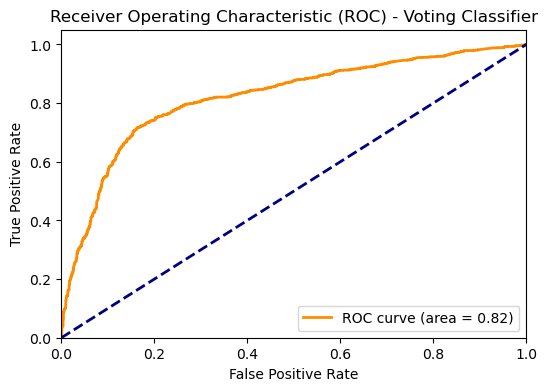

In [270]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Sample setup with probability support for each classifier
model1 = LogisticRegression(random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
model3 = SVC(probability=True, random_state=42)  # Ensure probability is enabled for SVC

# Setup Voting Classifier with soft voting
voting_clf = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('svc', model3)],
    voting='soft'
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Check and plot ROC curve if predict_proba is supported
if hasattr(voting_clf, "predict_proba"):
    y_test_pred_proba = voting_clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) - Voting Classifier')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("This Voting Classifier does not support probability predictions.")


XGBoosting Model

In [271]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Load and prepare your data
X = df_smote.drop('defects', axis=1)
y = df_smote['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', seed=42)

# Train XGBoost model
xgb_classifier.fit(X_train, y_train)

# Predict on training data
y_train_pred = xgb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on testing data
y_test_pred = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Perform cross-validation
cv_scores = cross_val_score(xgb_classifier, X, y, cv=5)

# Calculate mean CV score
mean_cv_score = cv_scores.mean()

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean CV Score: {mean_cv_score}")


Training Accuracy: 0.9117777975607585
Testing Accuracy: 0.8216447134211463
Cross-validation Scores: [0.7002492  0.81488074 0.8497151  0.85719373 0.85612536]
Mean CV Score: 0.8156328255028861


In [272]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Load and prepare your data
X = df_smote.drop('defects', axis=1)
y = df_smote['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier with tuned parameters
xgb_classifier = xgb.XGBClassifier(
    objective='binary:logistic',
    seed=42,
    max_depth=5,            # Reduced from default (usually 6 or higher)
    min_child_weight=3,     # Increased from default of 1
    subsample=0.8,          # Use 80% of data to train each tree
    colsample_bytree=0.8,   # Use 80% of features for each tree
    eta=0.1,                # Lower learning rate
    n_estimators=200        # Increase number of trees with lower learning rate
)

# Train XGBoost model
xgb_classifier.fit(X_train, y_train)

# Predict on training data
y_train_pred = xgb_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on testing data
y_test_pred = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Perform cross-validation
cv_scores = cross_val_score(xgb_classifier, X, y, cv=5)

# Calculate mean CV score
mean_cv_score = cv_scores.mean()

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean CV Score: {mean_cv_score}")


Training Accuracy: 0.857384492121428
Testing Accuracy: 0.8074047703809185
Cross-validation Scores: [0.69028124 0.78889284 0.82763533 0.82692308 0.83155271]
Mean CV Score: 0.7930570388829554


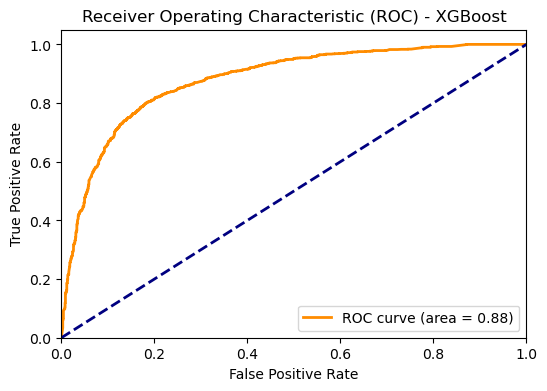

In [273]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming the XGBoost model is already trained and 'X_test' contains the test features
# Get prediction probabilities for the positive class
y_test_pred_proba = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)

# Calculate the AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - XGBoost')
plt.legend(loc="lower right")
plt.show()



Failed to plot ROC for Blended Model: X has 10 features, but LogisticRegression is expecting 3 features as input.


C:\Users\kushagra vashistha\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



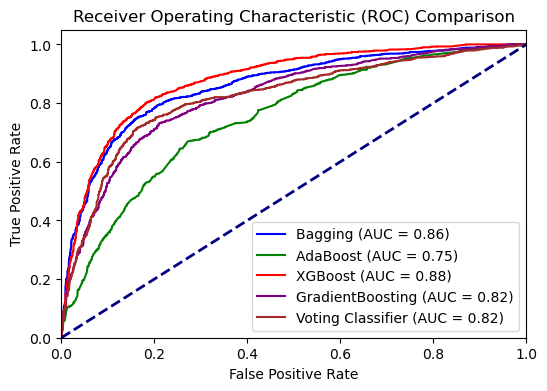

In [274]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X, y, label, ax, color='blue'):
    # Check if model supports probability prediction
    if hasattr(model, "predict_proba"):
        try:
            # Predict probabilities and calculate ROC
            y_proba = model.predict_proba(X)[:, 1]
            fpr, tpr, _ = roc_curve(y, y_proba)
            roc_auc = auc(fpr, tpr)
            ax.plot(fpr, tpr, color=color, label=f'{label} (AUC = {roc_auc:.2f})')
        except Exception as e:
            print(f"Failed to plot ROC for {label}: {str(e)}")
    else:
        print(f"{label} does not support probability predictions")

fig, ax = plt.subplots(figsize=(6, 4))

# Check each model before plotting
plot_roc_curve(bagging, X_test, y_test, "Bagging", ax, 'blue')
plot_roc_curve(ada_boost, X_test, y_test, "AdaBoost", ax, 'green')
plot_roc_curve(xgb_classifier, X_test, y_test, "XGBoost", ax, 'red')
plot_roc_curve(gradient_boosting, X_test, y_test, "GradientBoosting", ax, 'purple')
plot_roc_curve(voting_clf, X_test, y_test, "Voting Classifier", ax, 'brown')
if 'X_meta_test' in locals() and 'y_meta_test' in locals():
    plot_roc_curve(meta_model, X_meta_test, y_meta_test, "Blended Model", ax, 'black')

ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Comparison')
ax.legend(loc="lower right")
plt.show()


HYBRID MODEL(STACKING CLASSIFIER)

Stacked Generalization (Stacking)
Description: Stacking involves layering models where the first layer consists of various base models, and the second layer (or meta-model) learns to optimally combine the predictions of the base models. It's effective for both regression and classification problems.

Use Case: Use stacking when you want a robust prediction model that can benefit from the diverse patterns recognized by different types of models. For instance, combining decision trees with linear models might capture both non-linear and linear relationships in the data.

In [221]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Example dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]

# Meta-model
meta_model = LogisticRegression()

# Stacking classifier
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train stacked model
stacked_model.fit(X_train, y_train)

# Evaluate the model
print(f"Training Accuracy: {stacked_model.score(X_train, y_train)}")
print(f"Testing Accuracy: {stacked_model.score(X_test, y_test)}")


Training Accuracy: 0.96625
Testing Accuracy: 0.865


In [222]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_classification

# Example dataset
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models with reduced complexity
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, min_samples_split=20)),
    ('svc', SVC(C=0.5, probability=True))
]

# Meta-model with increased regularization
meta_model = LogisticRegression(C=0.5)

# Stacking classifier with cross-validation
stacked_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train stacked model
stacked_model.fit(X_train, y_train)

# Evaluate the model
training_accuracy = stacked_model.score(X_train, y_train)
testing_accuracy = stacked_model.score(X_test, y_test)
cv_scores = cross_val_score(stacked_model, X, y, cv=5)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")
print(f"Mean CV Score: {cv_scores.mean()}")


Training Accuracy: 0.94
Testing Accuracy: 0.875
Mean CV Score: 0.89


X_test shape: (200, 20)
Type: <class 'numpy.ndarray'>


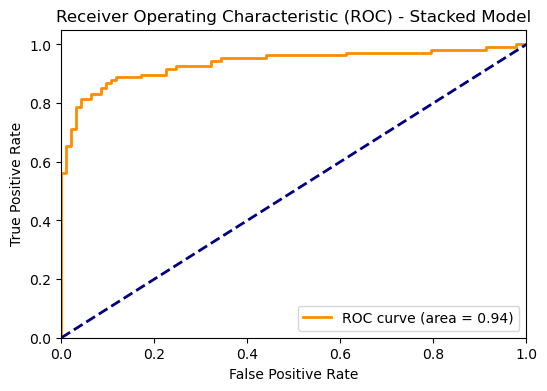

In [223]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Ensure the Stacked Model is properly trained and configured
if hasattr(stacked_model, "predict_proba"):
    try:
        # Check the shape and type of X_test to ensure compatibility
        print("X_test shape:", X_test.shape)
        print("Type:", type(X_test))

        # Attempt to get prediction probabilities
        y_test_pred_proba = stacked_model.predict_proba(X_test)[:, 1]

        # Calculate the ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - Stacked Model')
        plt.legend(loc="lower right")
        plt.show()
    except Exception as e:
        print(f"An error occurred while generating ROC curve: {str(e)}")
else:
    print("This Stacked Model does not support probability predictions in the format needed for ROC curves.")


3. Feature Union or Model Pipelining
Description: Involves creating a pipeline that uses transformations from multiple models or techniques. For instance, combining features generated by different unsupervised learning methods (like PCA, clustering) and using them as inputs to a supervised learning model.

Use Case: If your dataset benefits from diverse preprocessing and feature extraction methods, a feature union can capture a wide array of characteristics before feeding them into a final predictive model.

In [227]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Custom Transformer to select columns
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[:, self.cols]

# Function to convert numeric arrays to a single string
def convert_to_string(X):
    return [" ".join(map(str, row)) for row in X]

# Pipeline setup
pipeline = Pipeline([
    ('features', FeatureUnion([
        ('numeric', Pipeline([
            ('selector', ColumnSelector(cols=slice(0, 5))),  # Select first 5 numeric columns
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components=2))  # Reduce dimensionality
        ])),
        ('text', Pipeline([
            ('selector', ColumnSelector(cols=slice(5, 10))),  # Select next 5 columns as 'textual' simulation
            ('to_string', FunctionTransformer(convert_to_string)),  # Convert rows to single string
            ('vectorizer', TfidfVectorizer())  # Apply TFIDF Vectorizer
        ]))
    ])),
    ('classifier', LogisticRegression())
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict and evaluate
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_scores = cross_val_score(pipeline, X, y, cv=5)

# Output results
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print(f"Cross-validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")


Training Accuracy: 0.87875
Testing Accuracy: 0.77
Cross-validation Scores: [0.76  0.81  0.76  0.8   0.745]
Mean CV Score: 0.775


In [228]:
from sklearn.linear_model import LogisticRegression

# Update Logistic Regression in the pipeline with increased regularization
pipeline.set_params(classifier=LogisticRegression(C=0.1))  # Lower C means higher regularization

# Re-train and evaluate the pipeline
pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_scores = cross_val_score(pipeline, X, y, cv=5)

print(f"Updated Training Accuracy: {train_accuracy}")
print(f"Updated Testing Accuracy: {test_accuracy}")
print(f"Updated Cross-validation Scores: {cv_scores}")
print(f"Updated Mean CV Score: {cv_scores.mean()}")


Updated Training Accuracy: 0.78875
Updated Testing Accuracy: 0.775
Updated Cross-validation Scores: [0.765 0.8   0.755 0.8   0.74 ]
Updated Mean CV Score: 0.772


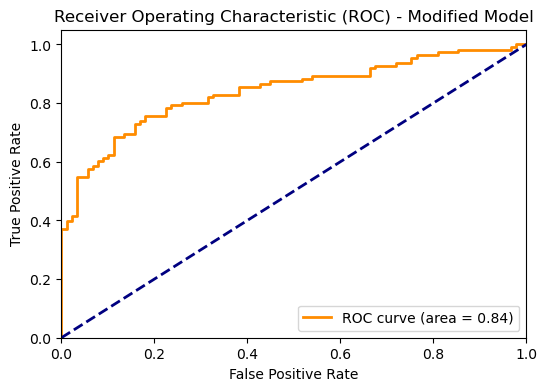

In [229]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Check if the pipeline supports predict_proba method
if hasattr(pipeline, "predict_proba"):
    try:
        # Attempt to get prediction probabilities
        y_test_pred_proba = pipeline.predict_proba(X_test)[:, 1]

        # Calculate the ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) - Modified Model')
        plt.legend(loc="lower right")
        plt.show()
    except Exception as e:
        print(f"An error occurred while generating ROC curve: {str(e)}")
else:
    print("This model does not support probability predictions necessary for ROC curves.")
